#**Estado del sector agricola en el territorio colombiano entre los años 2006 a 2018**

**Proyecto aplicado de análisis y visuacización de datos con Python**

*Autor*

Danny Alexander Rojas Moreno

> dannymoreno.2805@gmail.com

>[LinkedIn](https://www.linkedin.com/in/danny-alexander-rojas-moreno-a343a2196/)

#**Introducción**
El sector agrícola desempeña un papel fundamental en el desarrollo de toda sociedad, dado que este sector contribuye con satisfacer la necesidad más básica que puede presentar toda población, la alimentación. Por esta simple razón, se vuelve importante conocer el comportamiento de crecimiento o decrecimiento que puede sufrir este sector en determinada región. El objetivo principal de este trabajo fue emplear la ciencia de datos como herramienta de análisis, para entender el comportamiento del sector agrícola colombiano entre los años 2008 y 2018.

#**1.   Entendimiento del negocio**


### 1.1.   Objetivo del negocio y situación actual
  
    1.2.   Objetivos del proyecto
>**Objetivo general**

Emplear el lenguaje de programación Python en conjunto a la ciencia de datos como herramienta de análisis para entender el comportamiento del sector agrícola en el pedido comprendo entre los años 2006 y 2018 en Colombia.

>**Objetivos específicos**

* Entender el comportamiento que ha presentado el sector agrícola colombiano entre el 2006 al 2018.
* Determinar cuáles son los principales tipos de cultivos agrícolas que se producen en el territorio colombiano para cada periodo.
* Cuantificar de manera grafica el uso de la tierra para la siembra y cosecha destinadas en la actividad agrícola en el país para el año 2018.
* Identificar los departamentos más eficientes en la producción agrícola para el año 2018 en el territorio colombiano.
* Realizar un análisis estadístico del departamento que presento el mejor desempeño en 2018 para identificar sus fortalezas.


    1.3.   Desarrollo del proyecto
El presente proyecto inicia con la adquisición de la base de datos (BD), la cual se descargó de la base de [Datos Abiertos de Colombia](https://www.datos.gov.co/) . Con dicho BD se utilizaron diferentes algoritmos del lenguaje Python que permitieron realizar un reconocimiento de las características pertenecientes al conjunto de datos. En este proceso de entendimiento se realizó la limpieza inicial, identificando y eliminando datos faltantes. Enseguida a esto, se realizó algunos análisis estadísticos descriptivos que permitieron entender de manera más precisa la BD. En este primer intento por entender el conjunto de datos, fueron creados diferentes DataFrame (otros subconjuntos de la base de datos inicial) que facilitaron el manejo y entendimiento de los datos.

Los análisis estadísticos fueron realizados en primera instancia para el territorio colombiano como un todo, entre los años 2006 al 2018. En seguida, fue realizado un segundo análisis estadístico para los datos que componen el año 2018 (año más reciente según la BD). Por último, se analizó el departamento con mejor comportamiento, en este caso fue el Valle del Cauca; En este último punto, fueron creados mapas coroplético con lenguaje Python que permitieron entender visualmente el comportamiento productivo de este ultimo departamento. En las tres etapas de análisis, se realizarán pruebas descriptivas, de distribución y de correlación.




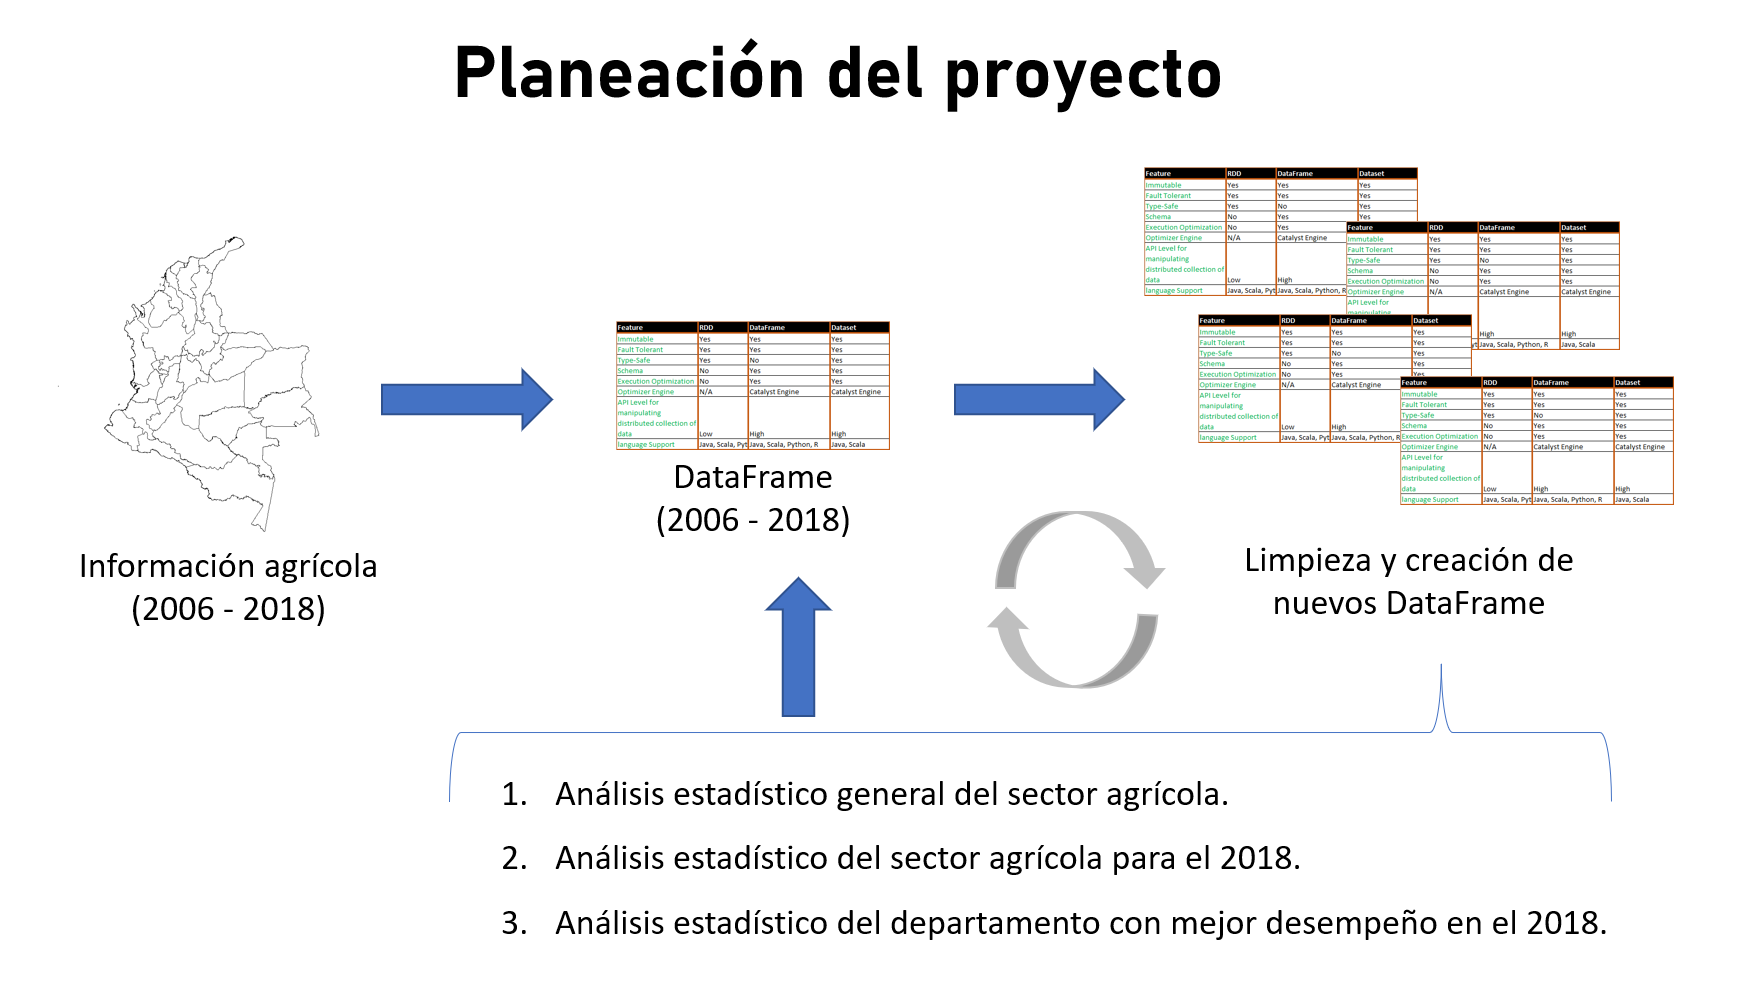

#**2.   Entendimiento de los datos (2006 al 2018)**
Antes de dar paso al entendimiento de los datos, debemos de importar las diferentes librerías de Python que permitirán realizar el trabajo de entendimiento y abstracción de la información que contiene la base de datos.


In [ ]:
!pip install pingouin

In [ ]:
## Librerías de manipulación y análisis matemáticos

import numpy as np # Libreria para uso de funciones matemáticas
import pandas as pd #  Libreria para manipulacion y análisis de datos
import scipy # Libraria usada para uso de metodos matemáticos (estadística)
from scipy import stats
import statsmodels.api as sm
import pingouin as pg #Libraria basada principalmente en Pandas y NumPy que permite el analisis estadistico

## Librerías para la visualización de datos

import seaborn as sns # Libreria para la visualización de datos
import matplotlib as mpl # Libreria para la generación de gráficos a partir de datos 
import plotly   # Librria que generar visualizaciones de datos en forma de gráficos y mapas interactivos
import matplotlib.pyplot as plt # visualización
import missingno as msno # visualización datos

%matplotlib inline # el resultado de los plots generados en la celda se muestran en la misma celda

###  2.1.   Adquisición e integración de datos

La base de datos "[Evaluaciones Agropecuarias Municipales - EVA](https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Evaluaciones-Agropecuarias-Municipales-EVA/2pnw-mmge)" (gov.co, 2022) es el conjuento de datos (BD) que se utilizó en el presente proyecto. Dicho BD proviene del Ministerio de Agricultura y Desarrollo Rural de la República de Colombia y contiene los históricos de producción agrícola Nacional por departamento y municipio obtenidos entre los años 2007 a 2018.



In [ ]:
#Importar la BD y crear un DataFrame (DF) con dichos datos.
eva = pd.read_csv("Evaluaciones_Agropecuarias_Municipales_EVA.csv")
## Fuente de la BD: https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Evaluaciones-Agropecuarias-Municipales-EVA/2pnw-mmge

###    2.2.   Análisis exploratorio de datos

 En este primer análisis se emplearon métodos estadísticos que nos ayudan a resumir y comprender de manera superficial el comportamiento de los datos que componen la BD estudio.


In [ ]:
#Mostras las 5 primeras filas que componen el DF.
eva.head()

CodDepar               Depar  CodMunicipio   Municipio  GpoCultivo  \
0        15              BOYACA         15114    BUSBANZA  HORTALIZAS   
1        25        CUNDINAMARCA         25754      SOACHA  HORTALIZAS   
2        25        CUNDINAMARCA         25214        COTA  HORTALIZAS   
3        54  NORTE DE SANTANDER         54405  LOS PATIOS  HORTALIZAS   
4        54  NORTE DE SANTANDER         54518    PAMPLONA  HORTALIZAS   

  SubGpoCultivo Cultivo SistProduc   Año Periodo  AreaSiembra(ha)  \
0        ACELGA  ACELGA     ACELGA  2006   2006B                2   
1        ACELGA  ACELGA     ACELGA  2006   2006B               82   
2        ACELGA  ACELGA     ACELGA  2006   2006B                2   
3        ACELGA  ACELGA     ACELGA  2006   2006B                3   
4        ACELGA  ACELGA     ACELGA  2006   2006B                1   

   AreaCosecha(ha)  Produc(t/ha)  Rendimiento(t/ha)      EFProduc  \
0                1             1               1.00  FRUTO FRESCO   
1               80          1440              18.00  FRUTO FRESCO   
2                2            26              17.33  FRUTO FRESCO   
3                3            48              16.00  FRUTO FRESCO   
4                1             5              10.00  FRUTO FRESCO   

        N.Client CicloCultivo  
0  BETA VULGARIS  TRANSITORIO  
1  BETA VULGARIS  TRANSITORIO  
2  BETA VULGARIS  TRANSITORIO  
3  BETA VULGARIS  TRANSITORIO  
4  BETA VULGARIS  TRANSITORIO

In [ ]:
eva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. 
DEP.                                     206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  object 
 2   CÓD. MUN.                                      206068 non-null  int64  
 3   MUNICIPIO                                      206067 non-null  object 
 4   GRUPO 
DE CULTIVO                              206068 non-null  object 
 5   SUBGRUPO 
DE CULTIVO                           206068 non-null  object 
 6   CULTIVO                                        206068 non-null  object 
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  object 
 8   AÑO                                            206068 non-null  int64  
 9   PERIODO                              

In [ ]:
#Mostrar los nombres de cada columna  
eva.columns

Index(['CÓD. \nDEP.', 'DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO',
       'GRUPO \nDE CULTIVO', 'SUBGRUPO \nDE CULTIVO', 'CULTIVO',
       'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO',
       'Área Sembrada\n(ha)', 'Área Cosechada\n(ha)', 'Producción\n(t)',
       'Rendimiento\n(t/ha)', 'ESTADO FISICO PRODUCCION',
       'NOMBRE \nCIENTIFICO', 'CICLO DE CULTIVO'],
      dtype='object')

Se observa que los nombres de las columnas presentan errores tipográficos, lo que puede complicar la exploración y entendimiento de los datos, por este motivo y antes de dar continuidad se modificaran dichos valores.

In [ ]:
#Modificación de los nombres de cada columna para una conseguir una mejor descripción general de los datos.
eva.columns = ["CodDepar","Depar","CodMunicipio","Municipio","GpoCultivo","SubGpoCultivo",
               "Cultivo","SistProduc","Año","Periodo","AreaSiembra(ha)","AreaCosecha(ha)",
               "Produc(t/ha)","Rendimiento(t/ha)","EFProduc","N.Client","CicloCultivo"]
eva.columns

Index(['CodDepar', 'Depar', 'CodMunicipio', 'Municipio', 'GpoCultivo',
       'SubGpoCultivo', 'Cultivo', 'SistProduc', 'Año', 'Periodo',
       'AreaSiembra(ha)', 'AreaCosecha(ha)', 'Produc(t/ha)',
       'Rendimiento(t/ha)', 'EFProduc', 'N.Client', 'CicloCultivo'],
      dtype='object')

In [ ]:
#Mostras las 5 primeras filas NUEVAMENTE, pero esta vez se tiene mejor visibilidad, debido al cambio de los nombres de cada columna que componen el DF.
eva.head()

CodDepar               Depar  CodMunicipio   Municipio  GpoCultivo  \
0        15              BOYACA         15114    BUSBANZA  HORTALIZAS   
1        25        CUNDINAMARCA         25754      SOACHA  HORTALIZAS   
2        25        CUNDINAMARCA         25214        COTA  HORTALIZAS   
3        54  NORTE DE SANTANDER         54405  LOS PATIOS  HORTALIZAS   
4        54  NORTE DE SANTANDER         54518    PAMPLONA  HORTALIZAS   

  SubGpoCultivo Cultivo SistProduc   Año Periodo  AreaSiembra(ha)  \
0        ACELGA  ACELGA     ACELGA  2006   2006B                2   
1        ACELGA  ACELGA     ACELGA  2006   2006B               82   
2        ACELGA  ACELGA     ACELGA  2006   2006B                2   
3        ACELGA  ACELGA     ACELGA  2006   2006B                3   
4        ACELGA  ACELGA     ACELGA  2006   2006B                1   

   AreaCosecha(ha)  Produc(t/ha)  Rendimiento(t/ha)      EFProduc  \
0                1             1               1.00  FRUTO FRESCO   
1               80          1440              18.00  FRUTO FRESCO   
2                2            26              17.33  FRUTO FRESCO   
3                3            48              16.00  FRUTO FRESCO   
4                1             5              10.00  FRUTO FRESCO   

        N.Client CicloCultivo  
0  BETA VULGARIS  TRANSITORIO  
1  BETA VULGARIS  TRANSITORIO  
2  BETA VULGARIS  TRANSITORIO  
3  BETA VULGARIS  TRANSITORIO  
4  BETA VULGARIS  TRANSITORIO

###    2.3    Descripciones generales

A continuación, se realizó una breve descripción de la BD.


In [ ]:
#Mostrar la cantidad y tipo de datos que conforman el DF
eva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CodDepar           206068 non-null  int64  
 1   Depar              206068 non-null  object 
 2   CodMunicipio       206068 non-null  int64  
 3   Municipio          206067 non-null  object 
 4   GpoCultivo         206068 non-null  object 
 5   SubGpoCultivo      206068 non-null  object 
 6   Cultivo            206068 non-null  object 
 7   SistProduc         206068 non-null  object 
 8   Año                206068 non-null  int64  
 9   Periodo            206068 non-null  object 
 10  AreaSiembra(ha)    206068 non-null  int64  
 11  AreaCosecha(ha)    206068 non-null  int64  
 12  Produc(t/ha)       206068 non-null  int64  
 13  Rendimiento(t/ha)  202635 non-null  float64
 14  EFProduc           206068 non-null  object 
 15  N.Client           203211 non-null  object 
 16  Ci

El DF cuenta con **206.068 series** (filas) y **11 columnas**. En relación al tipo de datos, este cuenta con: 

**1 variable de tipo float**, **6 de tipo int** y **10 de tipo object**.


In [ ]:
#Contabilizar los valores únicos que conforman a cada variable.
for i in eva.columns:
  print('Columna: ', i, '| Valores únicos: ', eva[i].nunique())

Columna:  CodDepar | Valores únicos:  32
Columna:  Depar | Valores únicos:  32
Columna:  CodMunicipio | Valores únicos:  1105
Columna:  Municipio | Valores únicos:  1018
Columna:  GpoCultivo | Valores únicos:  13
Columna:  SubGpoCultivo | Valores únicos:  120
Columna:  Cultivo | Valores únicos:  223
Columna:  SistProduc | Valores únicos:  271
Columna:  Año | Valores únicos:  13
Columna:  Periodo | Valores únicos:  36
Columna:  AreaSiembra(ha) | Valores únicos:  5023
Columna:  AreaCosecha(ha) | Valores únicos:  4557
Columna:  Produc(t/ha) | Valores únicos:  10230
Columna:  Rendimiento(t/ha) | Valores únicos:  3621
Columna:  EFProduc | Valores únicos:  23
Columna:  N.Client | Valores únicos:  214
Columna:  CicloCultivo | Valores únicos:  3


La BD cuenta con un total de 17 variables, de las cuales **4** pueden ser consideradas como **variables cuantitativas** (*AreaSiembra(ha)*, *AreaCosecha(ha)*, *Produc(t/ha)* y *Rendimiento(t/ha)*). Por otro lado, las demás variables pueden ser comprendida como variables cualitativas, pues describen cualidades de los datos.

>*Visualización de datos faltantes*

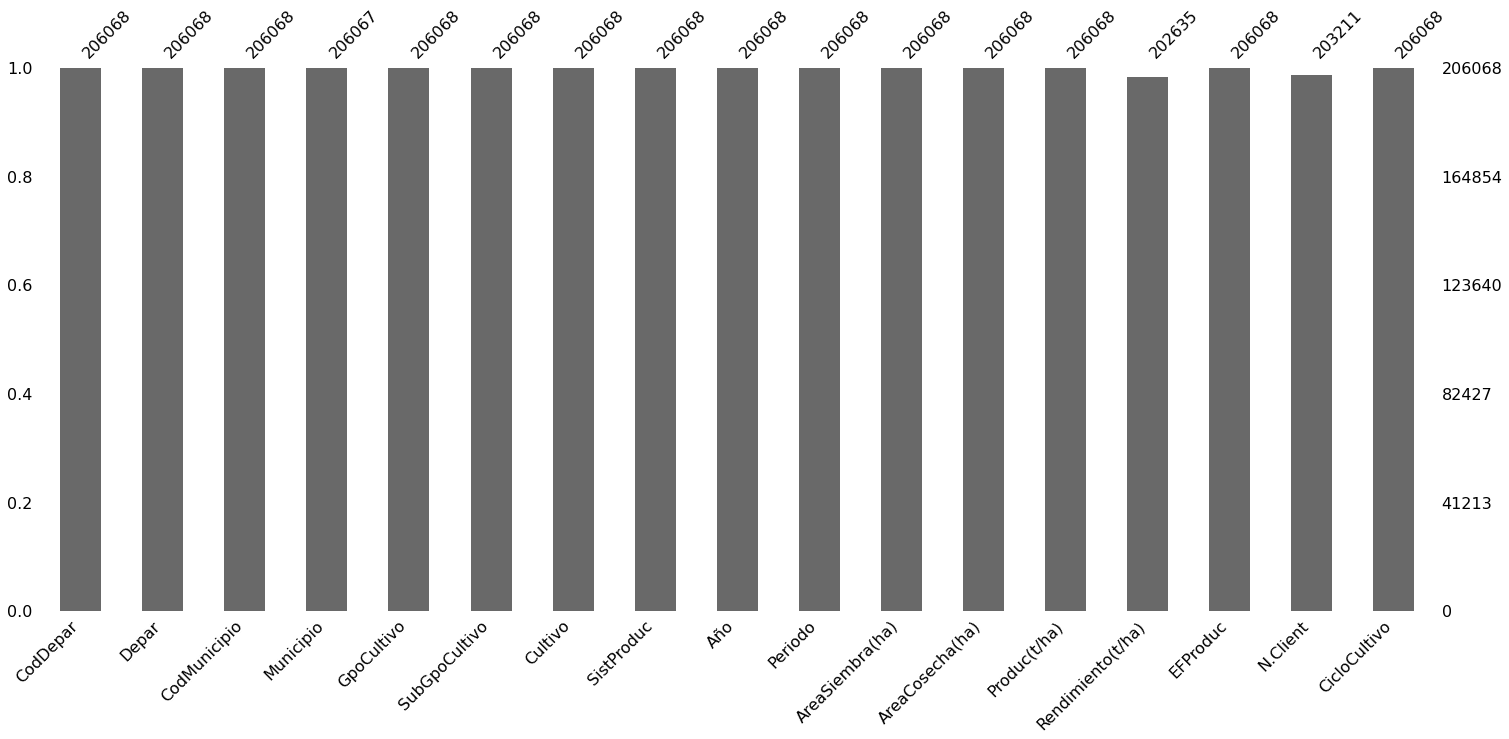

In [ ]:
#Visualizacion del número de datos en un diagrama de barras.
msno.bar(eva);

Se puede observar en la gráfica de barras las variables de 'Rendimiento(t/ha)' y 'N.Client', que son las únicas en presentar ausencia de datos (202.635 y 203.211 respectivamente). Más adelante, los datos faltantes para la variable 'Rendimiento(t/ha)' serán incluidos, ya que esta variable representa relevancia en el presente análisis de datos.


##    2.4    Análisis descriptivo y visualización de datos
En el presente ítem fueron calculadas las principales **medidas de posicionamiento** (medidas estadísticas que caracterizan la posición y distribución general de los datos). Además de estas medidas, se contemplaron algunas **medidas de dispersión** (medidas que reflejan la distancia media de los valores, en relación a las medidas de tendencia central).


**Estadísticos descriptivos conjunto de datos EVA**

---



*   Medidas de tendencia central y de dispersión






In [ ]:
#Descripción estadistica general de las variables númericas
eva.describe()

CodDepar   CodMunicipio            Año  AreaSiembra(ha)  \
count  206068.000000  206068.000000  206068.000000    206068.000000   
mean       40.322563   40747.534066    2012.455976       291.073825   
std        25.278662   25256.621906       3.479113      1153.602556   
min         5.000000    5001.000000    2006.000000         0.000000   
25%        17.000000   17524.000000    2009.000000        10.000000   
50%        41.000000   41357.000000    2013.000000        35.000000   
75%        68.000000   68001.000000    2015.000000       151.000000   
max        99.000000   99773.000000    2018.000000     47403.000000   

       AreaCosecha(ha)  Produc(t/ha)  Rendimiento(t/ha)  
count    206068.000000  2.060680e+05      202635.000000  
mean        249.419522  2.790726e+03           9.238820  
std         980.375226  4.511471e+04          14.888659  
min           0.000000  0.000000e+00           0.030000  
25%           8.000000  3.200000e+01           1.500000  
50%          30.000000  1.400000e+02           5.000000  
75%         130.000000  6.480000e+02          11.230000  
max       38600.000000  4.546116e+06         246.000000

Se puede observar en la anterior salida que los resultados numéricos obtenidos por medio del método `.describe()` no son congruentes para algunas variables. Esto se debe, a que el cálculo ha sido realizado sin tener en cuenta los tipos de variables, sean categóricas (año, departamento, municipio) y cuantitativos (área y productividad) en la organización de los datos.

Por lo anterior, se debe agrupar los datos por grupos categóricos para obtener una estadística descriptiva relevante.


In [ ]:
#Crear copia del DF original
eva_copy = eva.copy().drop(['CodDepar', 'CodMunicipio','Periodo','EFProduc','N.Client'], axis=1)
#La función .drop me permite eliminar algunas columnas que no seran utilizadas en el presente analisis.

In [ ]:
#Agrupar los datos por año para calcular los valores estadísticos descriptivos de cada año.
from pandas.core.algorithms import mode
#np.set_printoptions(precision= 2, suppress = True)
(eva_copy.groupby('Año').agg([np.sum, min, max, np.mean, np.median, mode, np.std]))

AreaSiembra(ha)                                                  \
                 sum min    max        mean median mode          std   
Año                                                                    
2006          805542   0  13200  197.824656   39.5   10   550.870308   
2007         4472717   0  35000  288.879222   45.0   10  1001.971929   
2008         4538730   0  35100  285.562476   41.0   10   991.960087   
2009         4614388   0  35484  282.779017   40.0   10  1009.996603   
2010         4721309   0  35484  284.091040   38.0   10  1032.274984   
2011         4886393   0  43600  294.502953   38.0   10  1116.761289   
2012         4974920   0  43600  295.142383   35.0   10  1146.231998   
2013         5134356   0  45000  290.914839   35.0    5  1130.158507   
2014         4987051   0  47403  286.053172   32.0    5  1145.826462   
2015         5116536   0  44550  285.840000   30.0    5  1191.758464   
2016         5452092   0  44550  296.325452   30.0   10  1279.507097   
2017         5460636   0  44717  291.140755   30.0    5  1325.017847   
2018         4816331   0  46535  341.680690   37.0    5  1474.698971   

     AreaCosecha(ha)             ... Produc(t/ha)                     \
                 sum min    max  ...       median mode           std   
Año                              ...                                   
2006          764081   0  13200  ...        121.5   20   3824.422270   
2007         3954103   0  31063  ...        176.0    0  45473.424971   
2008         3959371   0  33790  ...        158.0    0  40941.558007   
2009         3982581   0  34175  ...        140.0    0  49195.102416   
2010         3910749   0  34175  ...        135.0    0  40455.438446   
2011         4080685   0  38600  ...        135.0    0  44903.984277   
2012         4150041   0  35100  ...        135.0    0  40808.928487   
2013         4406289   0  33600  ...        140.0    0  41475.780756   
2014         4253265   0  31075  ...        136.0    0  45310.224246   
2015         4386948   0  32144  ...        126.0    0  45925.186370   
2016         4654449   0  34344  ...        132.0    0  44995.298470   
2017         4712842   0  35000  ...        129.0    0  48152.992562   
2018         4181978   0  33500  ...        175.0   60  58248.661779   

     Rendimiento(t/ha)                                                  
                   sum   min     max      mean median  mode        std  
Año                                                                     
2006          32685.60  0.13  180.00  8.032834    2.5   1.5  13.464242  
2007         133176.18  0.03  190.00  8.757558    5.1  10.0  13.583419  
2008         138012.89  0.05  196.67  8.872004    5.0  10.0  14.371947  
2009         145158.60  0.06  210.00  9.088317    5.0  10.0  15.196104  
2010         147220.38  0.07  200.00  9.053587    5.0  10.0  14.815615  
2011         145067.37  0.03  246.00  8.874793    5.0  10.0  15.074341  
2012         151517.80  0.10  246.00  9.145208    5.0  10.0  14.813627  
2013         161687.88  0.25  246.00  9.285469    5.0  10.0  14.787023  
2014         157515.34  0.09  210.00  9.182962    5.0  10.0  14.460602  
2015         162980.72  0.10  210.00  9.268694    5.0  10.0  14.365948  
2016         175053.71  0.10  210.00  9.685924    5.0  10.0  15.712169  
2017         182881.35  0.10  240.00  9.898319    5.3  10.0  15.943456  
2018         139150.40  0.10  192.11  9.969936    6.0  10.0  15.472566  

[13 rows x 28 columns]

In [ ]:
#Calcular y mostrar la sumatoria de cada una de las variables relacionadas a el área de extensión (ha) a lo largo del periodo de análisis.
def cal_sum_ha(eva_copy):
  return pd.Series({
      'Area de Siembra (ha)': eva_copy['AreaSiembra(ha)'].sum(),
      'Area de Cosecha (ha)': eva_copy['AreaCosecha(ha)'].sum(),
  })

sum_var_cuanti_ha = eva_copy.groupby('Año').apply(cal_sum_ha)
sum_var_cuanti_ha

Area de Siembra (ha)  Area de Cosecha (ha)
Año                                             
2006                805542                764081
2007               4472717               3954103
2008               4538730               3959371
2009               4614388               3982581
2010               4721309               3910749
2011               4886393               4080685
2012               4974920               4150041
2013               5134356               4406289
2014               4987051               4253265
2015               5116536               4386948
2016               5452092               4654449
2017               5460636               4712842
2018               4816331               4181978

In [ ]:
#Calcular y mostrar el promedio de la productividad por hectárea a lo largo del periodo de análisis.
def cal_mean_prod(eva_copy):
  return pd.Series({
      'Productividad (t/ha)': eva_copy['Produc(t/ha)'].mean(),
      'Rendimiento (t/ha)': eva_copy['Rendimiento(t/ha)'].mean()
  })

mean_var_cuanti_ton = eva_copy.groupby('Año').apply(cal_mean_prod)
mean_var_cuanti_ton   

Productividad (t/ha)  Rendimiento (t/ha)
Año                                           
2006           1022.629175            8.032834
2007           2784.983272            8.757558
2008           2604.176922            8.872004
2009           2815.870818            9.088317
2010           2558.182622            9.053587
2011           2734.587693            8.874793
2012           2611.278417            9.145208
2013           2653.383364            9.285469
2014           2793.776414            9.182962
2015           2805.567207            9.268694
2016           2855.017338            9.685924
2017           2962.684421            9.898319
2018           3880.471056            9.969936

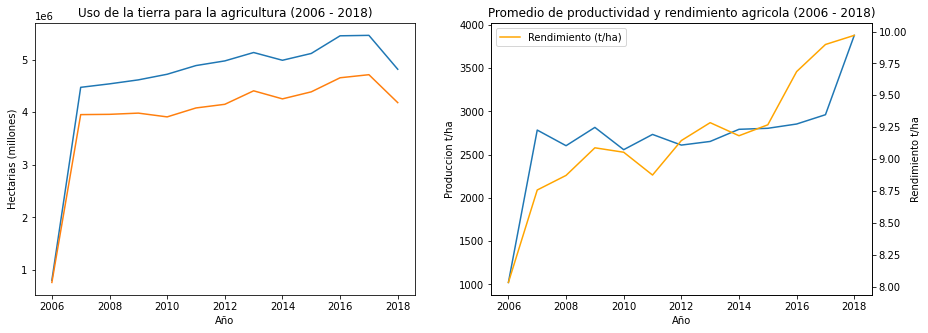

In [ ]:
#  Grafico que muestra el comportamiento de las variables cuantitativas a lo largo del periodo de análisis

##Grafico 1 --> área de uso de la agricultura (extensión)
fig1, axes = plt.subplots(1, 2, figsize=(15, 5), sharex = True)
axes[0].plot(sum_var_cuanti_ha, label = True)
axes[0].set_title('Uso de la tierra para la agricultura (2006 - 2018)')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Hectarias (millones)')

##Grafico 2 --> productividad y rendimiento de la agricultura
axes[1].plot(mean_var_cuanti_ton['Productividad (t/ha)'])
axes[1].set_title('Promedio de productividad y rendimiento agricola (2006 - 2018)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Produccion t/ha')

#-- uso del eje izq (grafico 2)
ax2 = axes[1].twinx()
ax2.plot(mean_var_cuanti_ton['Rendimiento (t/ha)'], color = 'orange', label = 'Rendimiento (t/ha)')
ax2.set_ylabel('Rendimiento t/ha');
#plt.plot(mean_var_cuanti_ton['Productividad (t/ha)'], label = 'Productividad (t/ha)')
plt.legend();

**Limpieza de datos**

---



*Creación de algunos conjunto de datos almacenados en matrices*



In [ ]:
#Historico de área de siembra por departamento
matriz1_eva_copy = eva_copy.pivot_table(values = 'AreaSiembra(ha)',
                                       index = 'Depar',
                                       columns = 'Año',
                                       aggfunc = 'sum')
matriz1_eva_copy

Año                          2006      2007      2008      2009      2010  \
Depar                                                                       
AMAZONAS                    215.0    3473.0    7528.0    2186.0    2273.0   
ANTIOQUIA                 68459.0  422714.0  435023.0  429482.0  434251.0   
ARAUCA                    10114.0   62183.0   63122.0   75767.0   80036.0   
ATLANTICO                  9487.0   25333.0   29255.0   35333.0   34512.0   
BOLIVAR                   65924.0  186247.0  207941.0  212974.0  230453.0   
BOYACA                    45397.0  174454.0  164918.0  168088.0  167065.0   
CALDAS                     5358.0  140564.0  138896.0  144670.0  140292.0   
CAQUETA                    6007.0   45438.0   45737.0   49194.0   53980.0   
CASANARE                  17168.0   93823.0  107382.0  132128.0  138781.0   
CAUCA                     10495.0  180377.0  180012.0  188017.0  189053.0   
CESAR                     49550.0  166087.0  172853.0  162717.0  166220.0   
CHOCO                      6575.0   53187.0   54495.0   65283.0   62600.0   
CORDOBA                   61662.0  178633.0  179854.0  181893.0  193229.0   
CUNDINAMARCA              71936.0  292808.0  284731.0  280571.0  298692.0   
GUAINIA                     161.0    2557.0    3898.0    2744.0    2972.0   
GUAVIARE                     86.0   17019.0   14121.0   17392.0   15994.0   
HUILA                     48723.0  264488.0  268506.0  266340.0  279678.0   
LA GUAJIRA                17162.0   38331.0   38972.0   39807.0   40487.0   
MAGDALENA                 26630.0  154161.0  158485.0  130062.0  150753.0   
META                      41299.0  272373.0  295677.0  319930.0  339193.0   
NARIÑO                    37531.0  233121.0  215842.0  221999.0  232457.0   
NORTE DE SANTANDER        27522.0  147823.0  153514.0  160895.0  162205.0   
PUTUMAYO                   6517.0   33674.0   32265.0   33776.0   30702.0   
QUINDIO                    1357.0   69325.0   67560.0   68655.0   67808.0   
RISARALDA                  1485.0   96018.0   92996.0   93829.0   92758.0   
SAN ANDRES Y PROVIDENCIA      NaN       NaN       NaN       NaN       NaN   
SANTANDER                 21367.0  287229.0  288397.0  282832.0  284418.0   
SUCRE                     31807.0   98683.0  117001.0  112790.0   95514.0   
TOLIMA                    82232.0  380248.0  362875.0  382272.0  376400.0   
VALLE DEL CAUCA           32785.0  348692.0  351275.0  348284.0  353541.0   
VAUPES                      281.0    1469.0    1139.0     845.0     382.0   
VICHADA                     250.0    2185.0    4460.0    3633.0    4610.0   

Año                           2011      2012      2013      2014      2015  \
Depar                                                                        
AMAZONAS                    2183.0    1073.0    1006.0    1119.0    1417.0   
ANTIOQUIA                 421095.0  434319.0  435146.0  427533.0  434056.0   
ARAUCA                     86998.0   85641.0   89130.0   84983.0   89258.0   
ATLANTICO                  28812.0   29303.0   34514.0   27153.0   24669.0   
BOLIVAR                   224974.0  256808.0  265715.0  252933.0  244142.0   
BOYACA                    164083.0  149318.0  160720.0  155072.0  148808.0   
CALDAS                    138153.0  140370.0  150981.0  148337.0  144093.0   
CAQUETA                    52745.0   52513.0   56847.0   54079.0   56598.0   
CASANARE                  175420.0  185271.0  194706.0  187858.0  224324.0   
CAUCA                     194768.0  212356.0  224604.0  210451.0  216171.0   
CESAR                     186027.0  198293.0  205583.0  201182.0  195437.0   
CHOCO                      69759.0   84987.0   93915.0   81439.0   90055.0   
CORDOBA                   195624.0  200605.0  225706.0  223861.0  198587.0   
CUNDINAMARCA              284089.0  273415.0  266072.0  262280.0  259653.0   
GUAINIA                     1649.0    1980.0    2706.0    2438.0    2012.0   
GUAVIARE                   12775.0   18715.0   21214.0 

In [ ]:
#Historico de área de siembra por grupo de cultivo
matriz2_eva_copy = eva_copy.pivot_table(values = 'AreaSiembra(ha)',
                                       index = 'GpoCultivo',
                                       columns = 'Año',
                                       aggfunc = 'sum')
matriz2_eva_copy

Año                                                   2006       2007  \
GpoCultivo                                                              
CEREALES                                          521803.0  1157252.0   
FIBRAS                                             40462.0    67504.0   
FLORES Y FOLLAJES                                     65.0      541.0   
FORESTALES                                             NaN    18266.0   
FRUTALES                                            5097.0   338001.0   
HONGOS                                                 NaN        NaN   
HORTALIZAS                                         33899.0    72242.0   
LEGUMINOSAS                                       114900.0   202764.0   
OLEAGINOSAS                                         2836.0   325516.0   
OTROS PERMANENTES                                      NaN  1451048.0   
OTROS TRANSITORIOS                                  2757.0     8702.0   
PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES     102.0     1448.0   
TUBERCULOS Y PLATANOS                              83621.0   829433.0   

Año                                                    2008       2009  \
GpoCultivo                                                               
CEREALES                                          1188552.0  1184064.0   
FIBRAS                                              69195.0    60070.0   
FLORES Y FOLLAJES                                    1406.0     1620.0   
FORESTALES                                          25242.0    33031.0   
FRUTALES                                           343582.0   348240.0   
HONGOS                                                  NaN        NaN   
HORTALIZAS                                          79536.0    77312.0   
LEGUMINOSAS                                        202136.0   205326.0   
OLEAGINOSAS                                        331324.0   352736.0   
OTROS PERMANENTES                                 1472665.0  1498870.0   
OTROS TRANSITORIOS                                   7521.0     5821.0   
PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES     1500.0     1910.0   
TUBERCULOS Y PLATANOS                              816071.0   845388.0   

Año                                                    2010       2011  \
GpoCultivo                                                               
CEREALES                                          1143201.0  1159257.0   
FIBRAS                                              66262.0    74742.0   
FLORES Y FOLLAJES                                    1729.0     1926.0   
FORESTALES                                          39818.0    41353.0   
FRUTALES                                           354736.0   364847.0   
HONGOS                                                  1.0        NaN   
HORTALIZAS                                          78437.0    87695.0   
LEGUMINOSAS                                        199470.0   221822.0   
OLEAGINOSAS                                        416134.0   476593.0   
OTROS PERMANENTES                                 1526814.0  1581386.0   
OTROS TRANSITORIOS                                   5802.0     7332.0   
PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES     2079.0     2055.0   
TUBERCULOS Y PLATANOS                              886826.0   867385.0   

Año                                                    2012       2013  \
GpoCultivo                                                               
CEREALES                                          1166653.0  1214991.0   
FIBRAS                                              47496.0    50529.0   
FLORES Y FOLLAJES                                    2045.0     2373.0   
FORESTALES                                          44208.0    49057.0   
FRUTALES                                           395469.0   404620.0   
HONGOS                                                  NaN        3.0   
HORTALIZAS                                          85270.0    87535.0   
LEGUMINOSAS     

In [ ]:
#Historico de área de siembra por tipo de cultivo
matriz3_eva_copy = eva_copy.pivot_table(values = 'AreaSiembra(ha)',
                                       index = 'CicloCultivo',
                                       columns = 'Año',
                                       aggfunc = 'sum')
matriz3_eva_copy

Año               2006       2007       2008       2009       2010       2011  \
CicloCultivo                                                                    
ANUAL              NaN   256805.0   265796.0   258061.0   284127.0   270456.0   
PERMANENTE         NaN  2550697.0  2582418.0  2663530.0  2772506.0  2898601.0   
TRANSITORIO   805542.0  1665215.0  1690516.0  1692797.0  1664676.0  1717336.0   

Año                2012       2013       2014       2015       2016  \
CicloCultivo                                                          
ANUAL          273672.0   295656.0   281884.0   258840.0   277457.0   
PERMANENTE    3041577.0  3088224.0  3124905.0  3197856.0  3310978.0   
TRANSITORIO   1659671.0  1750476.0  1580262.0  1659840.0  1863657.0   

Año                2017       2018  
CicloCultivo                        
ANUAL          267090.0   288961.0  
PERMANENTE    3340422.0  3436672.0  
TRANSITORIO   1853124.0  1090698.0

*Eliminar grupo de datos correspondientes a los años 2006, 2007 y 2008*

In [ ]:
eva_copy1 = eva_copy.drop(eva_copy[eva_copy['Año'] < 2009].index)
eva_copy1

Depar     Municipio  GpoCultivo SubGpoCultivo    Cultivo  \
26                   CAUCA  BUENOS AIRES  HORTALIZAS        ACELGA     ACELGA   
27            CUNDINAMARCA          COTA  HORTALIZAS        ACELGA     ACELGA   
28            CUNDINAMARCA        GUASCA  HORTALIZAS        ACELGA     ACELGA   
29            CUNDINAMARCA       NOCAIMA  HORTALIZAS        ACELGA     ACELGA   
30      NORTE DE SANTANDER    LOS PATIOS  HORTALIZAS        ACELGA     ACELGA   
...                    ...           ...         ...           ...        ...   
206063        CUNDINAMARCA         MANTA  HORTALIZAS     CALABACIN  CALABACIN   
206064        CUNDINAMARCA         PANDI  HORTALIZAS     CALABACIN  CALABACIN   
206065        CUNDINAMARCA         MANTA  HORTALIZAS     CALABACIN  CALABACIN   
206066        CUNDINAMARCA      TIBIRITA  HORTALIZAS     CALABACIN  CALABACIN   
206067        CUNDINAMARCA         PANDI  HORTALIZAS     CALABACIN  CALABACIN   

       SistProduc   Año  AreaSiembra(ha)  AreaCosecha(ha)  Produc(t/ha)  \
26         ACELGA  2009                1                1             0   
27         ACELGA  2009                6                6           106   
28         ACELGA  2009                1                1             9   
29         ACELGA  2009                0                0             0   
30         ACELGA  2009                2                2            32   
...           ...   ...              ...              ...           ...   
206063   ZUCCHINI  2017               20               18           180   
206064   ZUCCHINI  2017                2                2             8   
206065   ZUCCHINI  2018               15               15           150   
206066   ZUCCHINI  2018                6                6            50   
206067   ZUCCHINI  2018                5                5            25   

        Rendimiento(t/ha) CicloCultivo  
26                   0.50  TRANSITORIO  
27                  18.63  TRANSITORIO  
28                   9.00  TRANSITORIO  
29                   0.32  TRANSITORIO  
30                  16.00  TRANSITORIO  
...                   ...          ...  
206063              10.00  TRANSITORIO  
206064               5.00  TRANSITORIO  
206065              10.00  TRANSITORIO  
206066               8.27  TRANSITORIO  
206067               5.00  TRANSITORIO  

[170619 rows x 12 columns]

*Eliminar grupo de datos correspondientes al grupo de cultivos hongos*

In [ ]:
eva_copy2 = eva_copy1.drop(eva_copy[eva_copy['GpoCultivo'] == 'HONGOS'].index)
eva_copy2.head()

Depar     Municipio  GpoCultivo SubGpoCultivo Cultivo  \
26               CAUCA  BUENOS AIRES  HORTALIZAS        ACELGA  ACELGA   
27        CUNDINAMARCA          COTA  HORTALIZAS        ACELGA  ACELGA   
28        CUNDINAMARCA        GUASCA  HORTALIZAS        ACELGA  ACELGA   
29        CUNDINAMARCA       NOCAIMA  HORTALIZAS        ACELGA  ACELGA   
30  NORTE DE SANTANDER    LOS PATIOS  HORTALIZAS        ACELGA  ACELGA   

   SistProduc   Año  AreaSiembra(ha)  AreaCosecha(ha)  Produc(t/ha)  \
26     ACELGA  2009                1                1             0   
27     ACELGA  2009                6                6           106   
28     ACELGA  2009                1                1             9   
29     ACELGA  2009                0                0             0   
30     ACELGA  2009                2                2            32   

    Rendimiento(t/ha) CicloCultivo  
26               0.50  TRANSITORIO  
27              18.63  TRANSITORIO  
28               9.00  TRANSITORIO  
29               0.32  TRANSITORIO  
30              16.00  TRANSITORIO

*Eliminar grupo de series (filas) de datos faltantes por la columna rendimiento (t/ha)*

In [ ]:
eva_copy2 = eva_copy1[eva_copy1['Rendimiento(t/ha)'].notna()]
eva_copy2.head()

Depar     Municipio  GpoCultivo SubGpoCultivo Cultivo  \
26               CAUCA  BUENOS AIRES  HORTALIZAS        ACELGA  ACELGA   
27        CUNDINAMARCA          COTA  HORTALIZAS        ACELGA  ACELGA   
28        CUNDINAMARCA        GUASCA  HORTALIZAS        ACELGA  ACELGA   
29        CUNDINAMARCA       NOCAIMA  HORTALIZAS        ACELGA  ACELGA   
30  NORTE DE SANTANDER    LOS PATIOS  HORTALIZAS        ACELGA  ACELGA   

   SistProduc   Año  AreaSiembra(ha)  AreaCosecha(ha)  Produc(t/ha)  \
26     ACELGA  2009                1                1             0   
27     ACELGA  2009                6                6           106   
28     ACELGA  2009                1                1             9   
29     ACELGA  2009                0                0             0   
30     ACELGA  2009                2                2            32   

    Rendimiento(t/ha) CicloCultivo  
26               0.50  TRANSITORIO  
27              18.63  TRANSITORIO  
28               9.00  TRANSITORIO  
29               0.32  TRANSITORIO  
30              16.00  TRANSITORIO

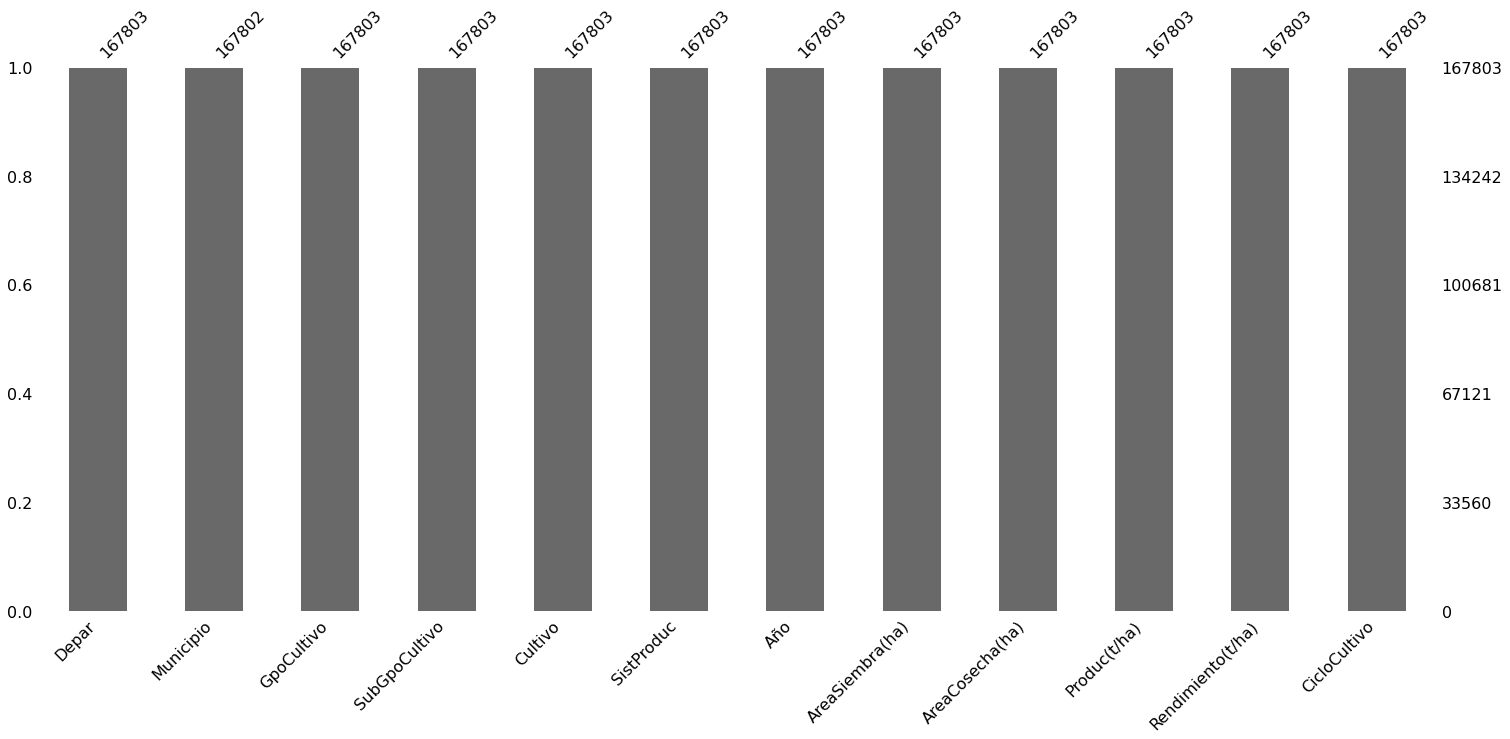

In [ ]:
#Visualizar en diagrama de barras
msno.bar(eva_copy2);

***Comportamiento histórico el uso de tierra y rendimiento entre el 2009 y 2018***

---





In [ ]:
##Crear un nuevo dataFarme con los grupos creados anteriormente
cal_sum_ha_eva_copy2 = eva_copy2.groupby('Año').agg({'AreaSiembra(ha)':sum, 'AreaCosecha(ha)':sum})
cal_sum_ha_eva_copy2

AreaSiembra(ha)  AreaCosecha(ha)
Año                                   
2009          4592746          3982581
2010          4674127          3910749
2011          4842612          4080685
2012          4940349          4150041
2013          5110341          4406289
2014          4968707          4253265
2015          5098765          4386948
2016          5431974          4654449
2017          5441017          4712842
2018          4806707          4181978

In [ ]:
cal_mean_prod_eva_copy2 = eva_copy2.groupby('Año').agg({'Produc(t/ha)':np.mean,'Rendimiento(t/ha)':np.mean})
cal_mean_prod_eva_copy2

Produc(t/ha)  Rendimiento(t/ha)
Año                                  
2009   2876.870774           9.088317
2010   2614.503229           9.053587
2011   2775.742016           8.874793
2012   2656.670027           9.145208
2013   2689.344915           9.285469
2014   2839.543986           9.182962
2015   2855.985726           9.268694
2016   2906.516018           9.685924
2017   3007.583297           9.898319
2018   3919.117289           9.969936

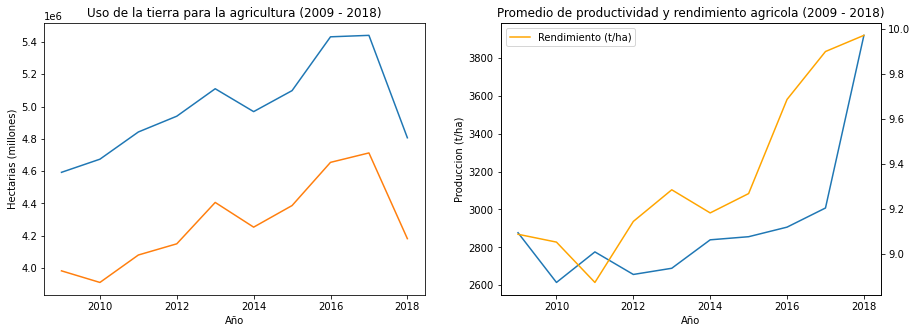

In [ ]:
#  Grafico que muestra el comportamiento de las variables cuantitativas a lo largo del periodo de análisis

##Grafico 1 --> área de uso de la agricultura (extensión)
fig2, axes = plt.subplots(1, 2, figsize=(15, 5), sharex = True)
axes[0].plot(cal_sum_ha_eva_copy2, label = True)
axes[0].set_title('Uso de la tierra para la agricultura (2009 - 2018)')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Hectarias (millones)')

##Grafico 2 --> productividad y rendimiento de la agricultura
axes[1].plot(cal_mean_prod_eva_copy2['Produc(t/ha)'], label = 'Productividad (t/ha)')
axes[1].set_title('Promedio de productividad y rendimiento agricola (2009 - 2018)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Produccion (t/ha)')

ax2 = axes[1].twinx()
ax2.plot(cal_mean_prod_eva_copy2['Rendimiento(t/ha)'], color = 'orange', label = 'Rendimiento (t/ha)')
plt.legend();

>*   Distribución de las variables numéricas (histograma)







Se opto por elaborar un histograma de densidad, el cual busca representar la distribución de los datos relacionados al área de siembra, área de cosecha, la producción y el rendimiento de la producción agrícola en el país, entre los años 2006 al 2018.

In [ ]:
#Creación de objetos por cada variable estudio.
AreaSiembraPeriodo = eva_copy2['AreaSiembra(ha)']
AreaCosechaPeriodo = eva_copy2['AreaCosecha(ha)']
ProduccionPeriodo = eva_copy2['Produc(t/ha)']
RendimientoPeriodo = eva_copy2['Rendimiento(t/ha)'] 

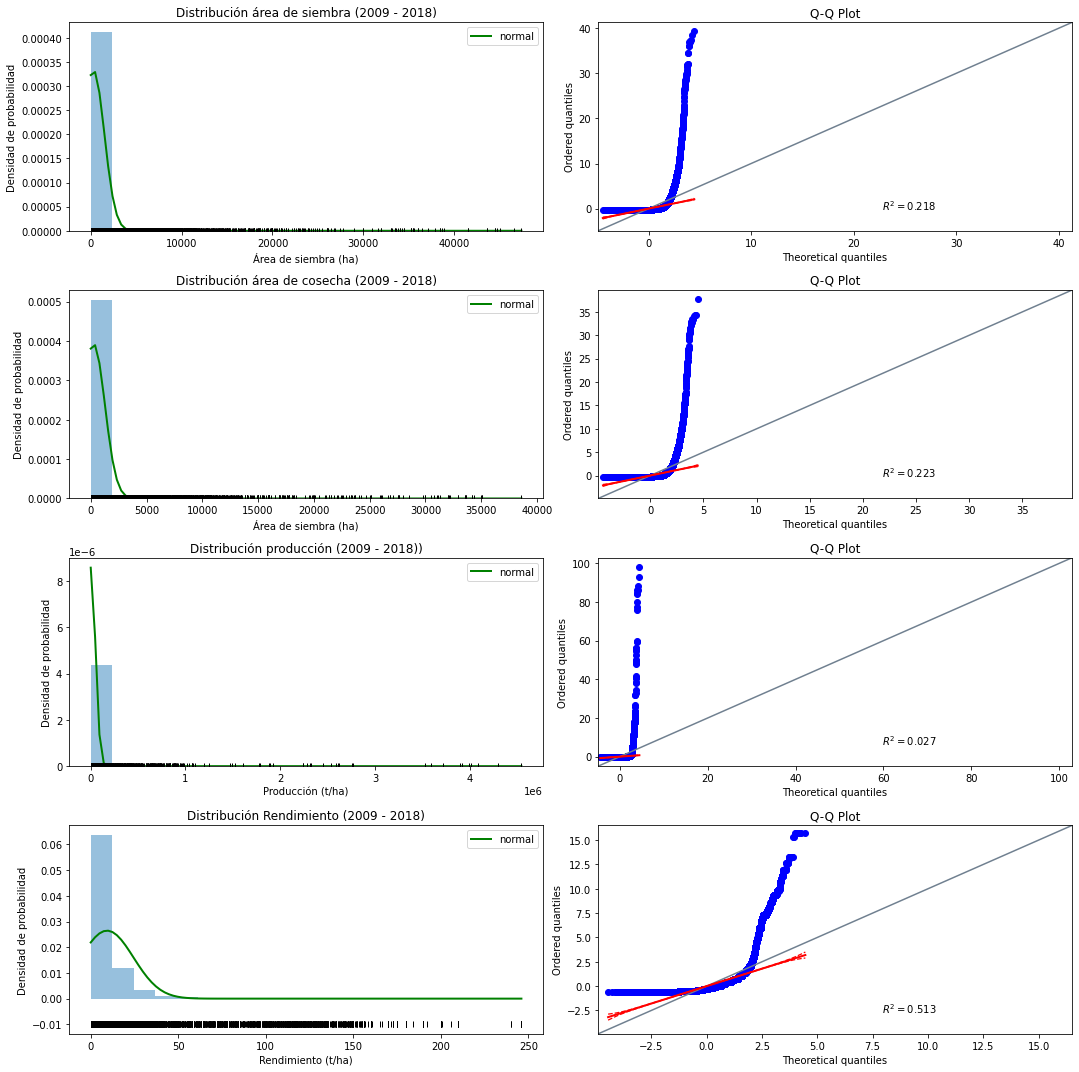

In [ ]:
fig3, axs = plt.subplots(4, 2, figsize=(15, 15))

# Gráfico 1 - cultivos transitorios 
mu, sigma = stats.norm.fit(AreaSiembraPeriodo) #valores de media(mu) y desviación típica (sigma) del grupo

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(AreaSiembraPeriodo), max(AreaSiembraPeriodo), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0, 0].plot(x_hat, y_hat, linewidth=2, color="green", label='normal') #
axs[0, 0].hist(x=AreaSiembraPeriodo, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(AreaSiembraPeriodo, np.full_like(AreaSiembraPeriodo, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución área de siembra (2009 - 2018)')
axs[0, 0].set_xlabel('Área de siembra (ha)')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot - transitorios
pg.qqplot(AreaSiembraPeriodo, dist='norm', ax=axs[0, 1])

# Gráfico 2 - cultivos permanentes
mu, sigma = stats.norm.fit(AreaCosechaPeriodo)
x_hat = np.linspace(min(AreaCosechaPeriodo), max(AreaCosechaPeriodo), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, color="green", label='normal')
axs[1, 0].hist(x=AreaCosechaPeriodo, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(AreaCosechaPeriodo, np.full_like(AreaCosechaPeriodo, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución área de cosecha (2009 - 2018)')
axs[1, 0].set_xlabel('Área de siembra (ha)')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

# Gráfico distribución qq-plot - transitorios
pg.qqplot(AreaCosechaPeriodo, dist='norm', ax=axs[1, 1])

#Gráfico 3 - cultivos anuales
mu, sigma = stats.norm.fit(ProduccionPeriodo)
x_hat = np.linspace(min(ProduccionPeriodo), max(ProduccionPeriodo), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[2, 0].plot(x_hat, y_hat, linewidth=2, color="green", label='normal')
axs[2, 0].hist(x=ProduccionPeriodo, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[2, 0].plot(ProduccionPeriodo, np.full_like(ProduccionPeriodo, -0.01), '|k', markeredgewidth=1)
axs[2, 0].set_title('Distribución producción (2009 - 2018))')
axs[2, 0].set_xlabel('Producción (t/ha)')
axs[2, 0].set_ylabel('Densidad de probabilidad')
axs[2, 0].legend()

pg.qqplot(ProduccionPeriodo, dist='norm', ax=axs[2, 1])

#Gráfico 4 - cultivos anuales
mu, sigma = stats.norm.fit(RendimientoPeriodo)
x_hat = np.linspace(min(RendimientoPeriodo), max(RendimientoPeriodo), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[3, 0].plot(x_hat, y_hat, linewidth=2, color="green", label='normal')
axs[3, 0].hist(x=RendimientoPeriodo, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[3, 0].plot(RendimientoPeriodo, np.full_like(RendimientoPeriodo, -0.01), '|k', markeredgewidth=1)
axs[3, 0].set_title('Distribución Rendimiento (2009 - 2018)')
axs[3, 0].set_xlabel('Rendimiento (t/ha)')
axs[3, 0].set_ylabel('Densidad de probabilidad')
axs[3, 0].legend()

pg.qqplot(RendimientoPeriodo, dist='norm', ax=axs[3, 1])

plt.tight_layout();

*  *Explicación de los resultados:*

Los histogramas nos permiten comprender la forma de la distribución de un conjunto de datos. Es así, que en los histogramas obtenidos podemos concluir en primera instancia que **en las 4 variables analizadas no se evidencia una distribución normal** de los datos debido a que se observa un patrón de sesgado positivo en los datos, ósea, hay una mayor distribución de los datos hacia la izquierda. Sin embargo, se puede inferir que este comportamiento no es tan fuerte para la variable Rendimiento(t/ha).

Por otro lado, en los **gráficos q-q plot** se observa que los puntos se distancian de la línea roja, lo cual indica la existencia de desviación de la normalidad en el grupo de datos.

En conclusión, **la ausencia de una distribución normal en el conjunto de datos capturados entre el año 2006 y el 2018** era un resultado esperado, ya que es probable que estas variables presenten incremento a lo largo del tiempo.


>*   Relación cruzada entre todas las variables (2009 - 2018)

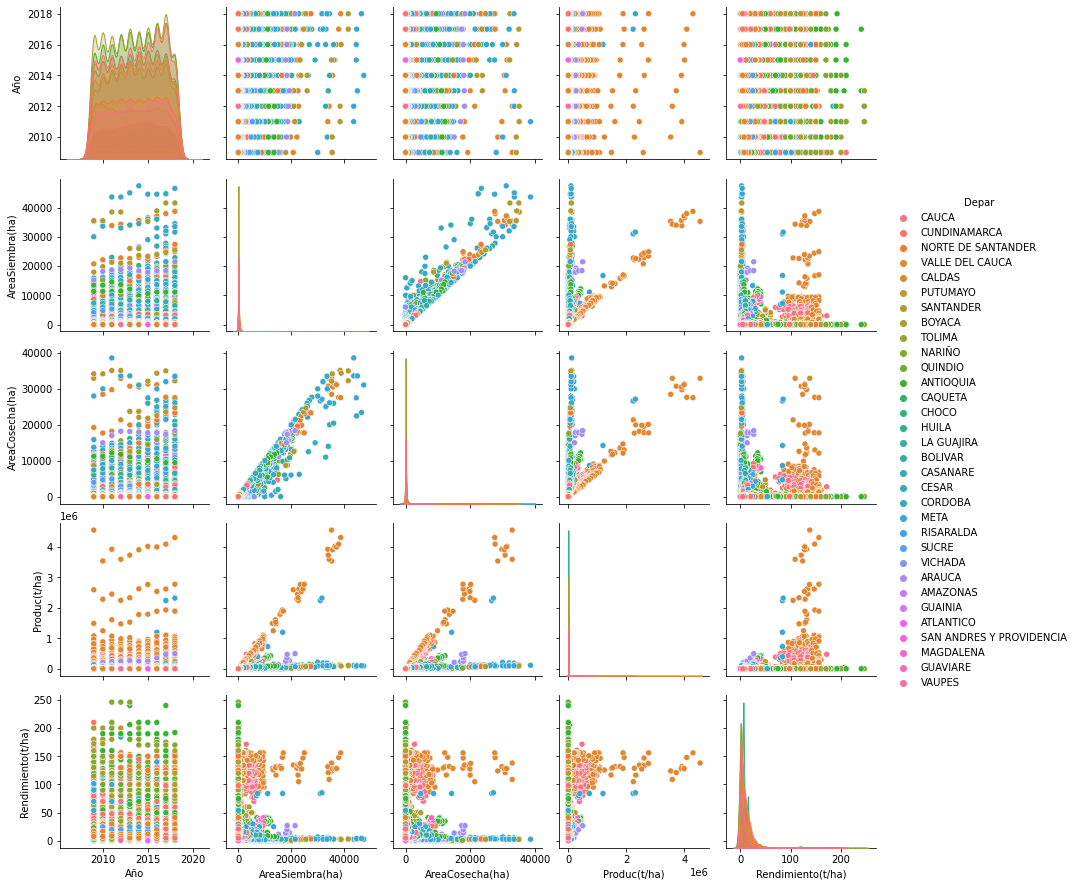

In [ ]:
# Separación de datos por la clase 'Depar' (departamento)
sns.pairplot(eva_copy2, hue = 'Depar', dropna=True);

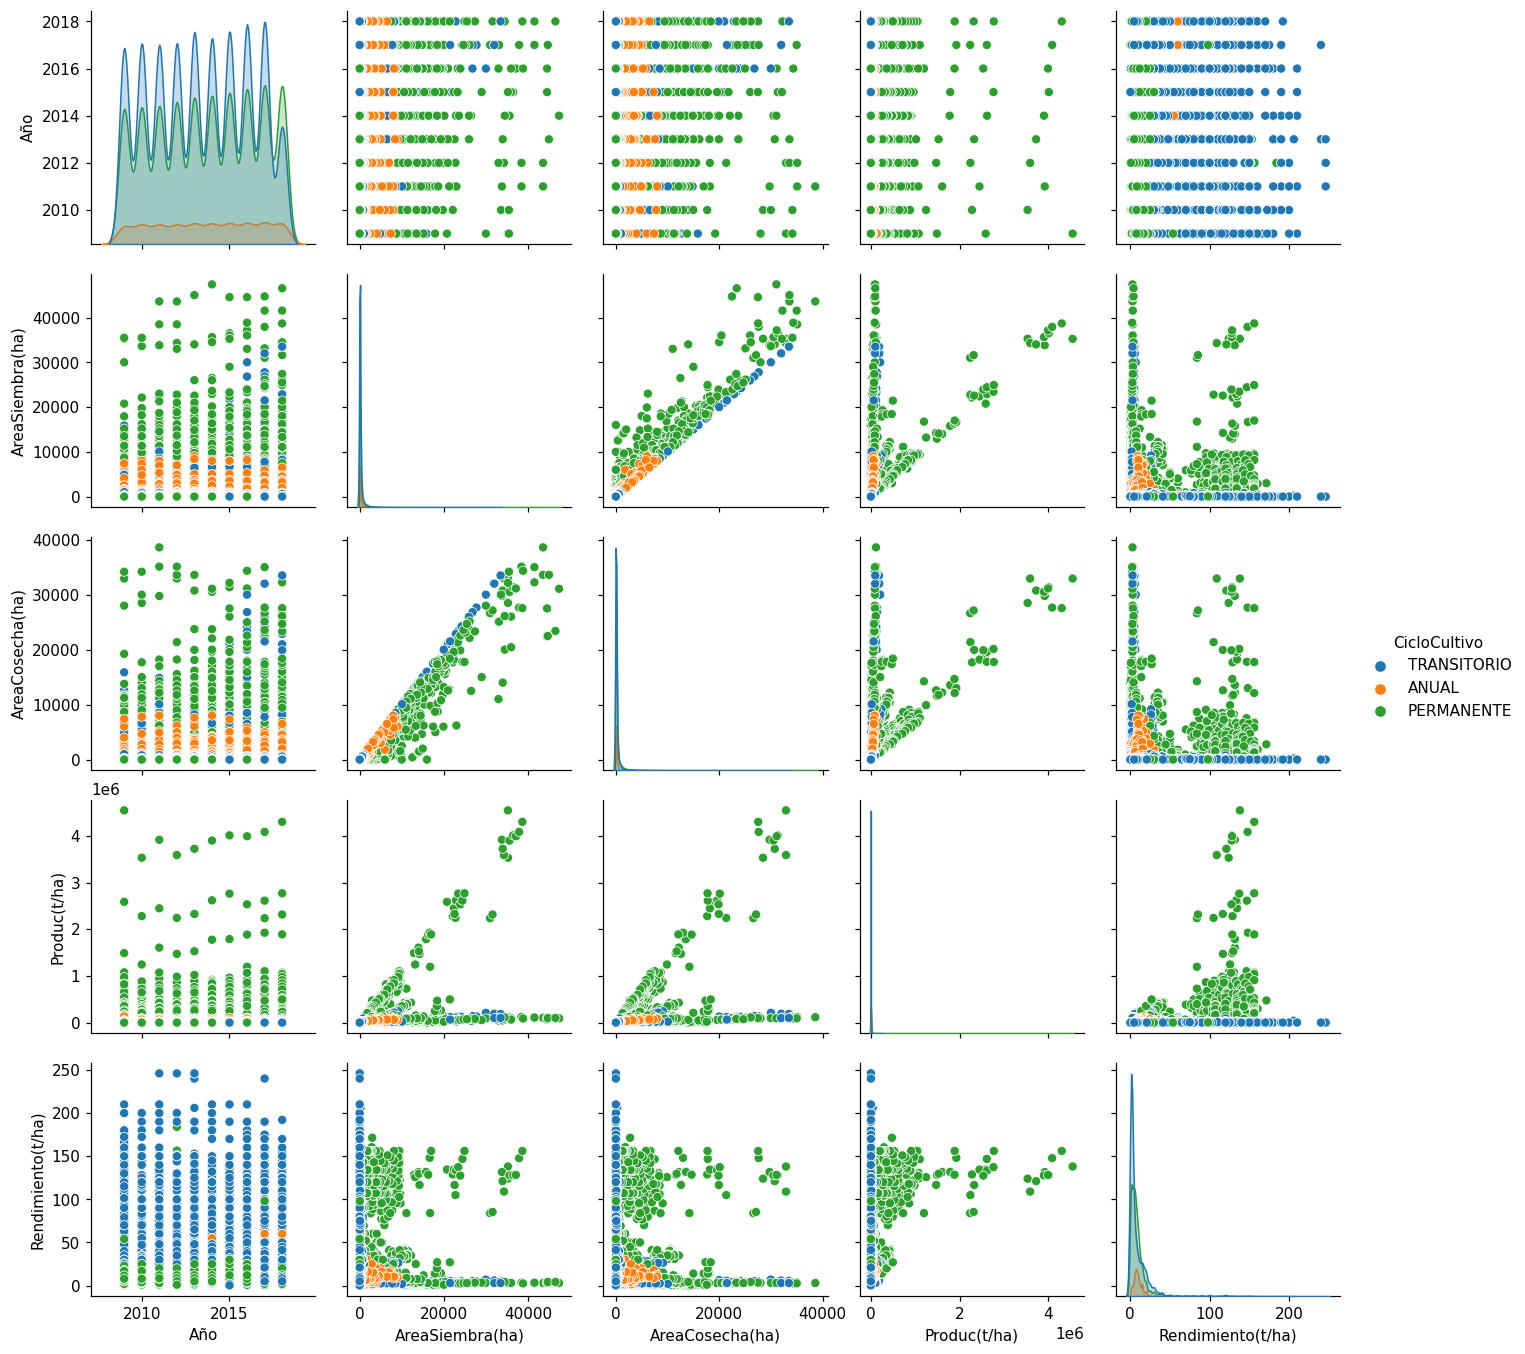

In [ ]:
sns.pairplot(eva_copy2, hue = 'CicloCultivo', dropna=True);

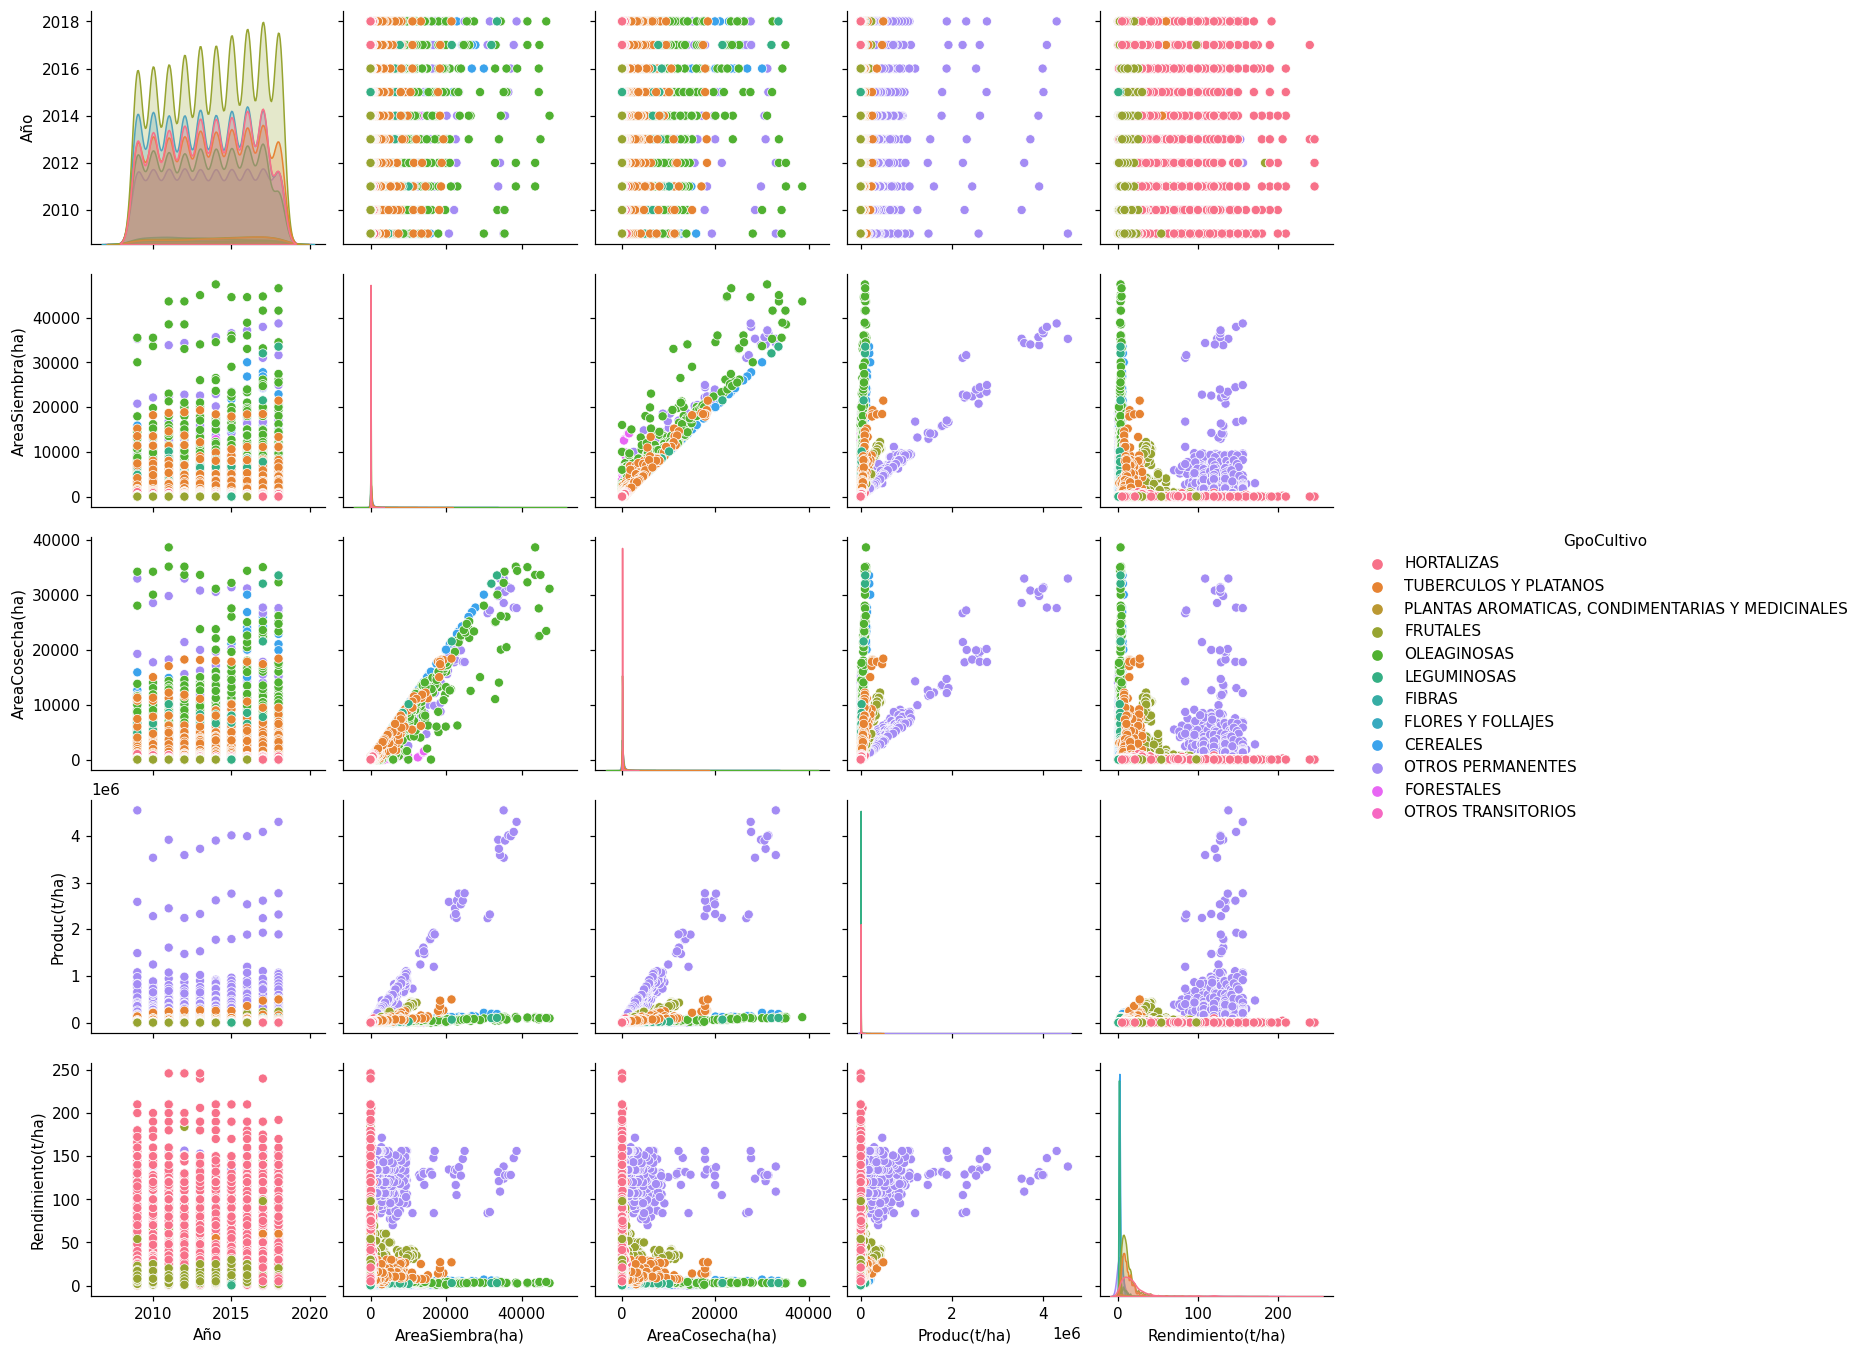

In [ ]:
# Separación de datos por la clase 'GpoCultivo' (grupo de cultivo)
sns.pairplot(eva_copy2, hue = 'GpoCultivo', dropna=True);

#**3.  Análisis descriptivo y visualización de datos para el año 2018**




Ahora realizaremos nuevamente una breve descripción estadística de los datos que componen la BD del año 2018

In [ ]:
##Observar los grupos por año
for año, grupo in eva_copy2.groupby('Año'):
  print(f'Nombre del grupo: {año}')
  print(grupo)

*Agrupamiento de los datos para el año 2018 y cálculos de sus estadísticos descriptivos.*

In [ ]:
##Crear DF agrupando los datos para el año 2018.
A2018 = (eva_copy2.groupby('Año').get_group(2018)).drop(['Año'], axis = 1)
A2018.head()

Depar  Municipio  GpoCultivo SubGpoCultivo Cultivo SistProduc  \
200  ANTIOQUIA  MARINILLA  HORTALIZAS        ACELGA  ACELGA     ACELGA   
201     BOYACA  VIRACACHA  HORTALIZAS        ACELGA  ACELGA     ACELGA   
202     BOYACA   SOGAMOSO  HORTALIZAS        ACELGA  ACELGA     ACELGA   
203    CAQUETA    CURILLO  HORTALIZAS        ACELGA  ACELGA     ACELGA   
204      CAUCA     TIMBIO  HORTALIZAS        ACELGA  ACELGA     ACELGA   

     AreaSiembra(ha)  AreaCosecha(ha)  Produc(t/ha)  Rendimiento(t/ha)  \
200               10               10           277              27.68   
201                2                2             8               4.00   
202                1                1             6               6.00   
203                3                3             9               3.00   
204               10               10            43               4.30   

    CicloCultivo  
200  TRANSITORIO  
201  TRANSITORIO  
202  TRANSITORIO  
203  TRANSITORIO  
204  TRANSITORIO

In [ ]:
A2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13957 entries, 200 to 206067
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depar              13957 non-null  object 
 1   Municipio          13957 non-null  object 
 2   GpoCultivo         13957 non-null  object 
 3   SubGpoCultivo      13957 non-null  object 
 4   Cultivo            13957 non-null  object 
 5   SistProduc         13957 non-null  object 
 6   AreaSiembra(ha)    13957 non-null  int64  
 7   AreaCosecha(ha)    13957 non-null  int64  
 8   Produc(t/ha)       13957 non-null  int64  
 9   Rendimiento(t/ha)  13957 non-null  float64
 10  CicloCultivo       13957 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


>*   Valores descriptivos por departamento y por producto agrícola.


In [ ]:
## Valores descriptivos --> variables cuantitativas X tipo de cultivo.
(A2018.groupby('GpoCultivo').agg([np.sum, min, max, np.mean, np.median, mode, np.std])).T

GpoCultivo                   CEREALES      FIBRAS FLORES Y FOLLAJES  \
AreaSiembra(ha)   sum          783873       21139              4498   
                  min               0           1                 1   
                  max           33500        2411               678   
                  mean     480.608829  222.515789         52.302326   
                  median         83.0        67.0              10.0   
                  mode             20     [6, 20]                 4   
                  std      1684.04426  436.308837         107.42878   
AreaCosecha(ha)   sum          783840       18981              4248   
                  min               0           1                 1   
                  max           33500        2411               678   
                  mean     480.588596       199.8         49.395349   
                  median         83.0        62.0              10.0   
                  mode             20          15                 4   
                  std     1684.049323  414.071856        103.334668   
Produc(t/ha)      sum         2999574       35493             51474   
                  min               0           1                 1   
                  max          184534        7129              8535   
                  mean    1839.101165  373.610526        598.534884   
                  median        165.0        84.0              52.0   
                  mode             30           5                 8   
                  std     8764.462618  862.049763       1405.455846   
Rendimiento(t/ha) sum          4542.8      204.09            917.01   
                  min             0.3         0.2               0.8   
                  max            45.0        18.0              70.0   
                  mean       2.785285    2.148316         10.662907   
                  median          1.9         1.5               6.0   
                  mode            2.0         1.0               1.0   
                  std        3.590854    2.349722          12.31008   

GpoCultivo                 FORESTALES      FRUTALES       HONGOS   HORTALIZAS  \
AreaSiembra(ha)   sum           58122        506962            2        58509   
                  min               2             0            1            0   
                  max           14128         10560            1         1210   
                  mean     593.081633     111.22466          1.0    35.481504   
                  median        162.0          22.0          1.0         10.0   
                  mode             10             5            1            5   
                  std     1593.912153    431.646709          0.0    90.214314   
AreaCosecha(ha)   sum           21750        423702            2        58323   
                  min               2             0            1            0   
                  max            1500         10560            1         1210   
                  mean     221.938776     92.957876          1.0    35.368708   
                  median         71.0          17.0          1.0         10.0   
                  mode       [10, 30]             2            1            5   
                  std       320.42394    403.201109          0.0    89.406592   
Produc(t/ha)      sum           27188       7087402           82      1322691   
                  min               1             0            4            0   
                  max            2147        361742           78        60500   
                  mean     277.428571   1554.936814         41.0   802.117041   
                  median         73.0         160.0         41.0        143.0   
                  mode       [12, 48]            60      [4, 78]           60   
                  std      439.424929  11691.553807    52.325902  2805.341119   
Rendimiento(t/ha) sum          125.76      55504.61         64.0     35557.49   
                  min             0.1           0.1          4.0         0.41

In [ ]:
## Valores descriptivos --> variables cuantitativas X departamento.
(A2018.groupby('Depar').agg([np.sum, min, max, np.mean, np.median, mode, np.std])).T

Depar                        AMAZONAS     ANTIOQUIA  \
AreaCosecha(ha)   sum            3611        343452   
                  min               1             0   
                  max            1200         10560   
                  mean          157.0    254.032544   
                  median         23.0          32.0   
                  mode             23        [3, 5]   
                  std      327.177739    811.407365   
Produc(t/ha)      sum           21240       3240919   
                  min               2             0   
                  max            8000        361742   
                  mean     923.478261   2397.129438   
                  median         73.0         191.0   
                  mode              2             5   
                  std     2208.661233  17918.067304   
Rendimiento(t/ha) sum           89.32      16009.58   
                  min             0.1           0.2   
                  max            10.0        192.11   
                  mean       3.883478     11.841405   
                  median          4.0           5.0   
                  mode            4.0          10.0   
                  std        2.790747     20.622488   

Depar                                             ARAUCA    ATLANTICO  \
AreaCosecha(ha)   sum                              67985        25341   
                  min                                  4            1   
                  max                              18368         1800   
                  mean                       1062.265625    98.988281   
                  median                           122.0         30.0   
                  mode    [5, 8, 15, 32, 60, 1100, 1300]            5   
                  std                        2572.937776   213.938061   
Produc(t/ha)      sum                             945377       231791   
                  min                                  5            4   
                  max                             495925        22500   
                  mean                      14771.515625   905.433594   
                  median                          1372.0        200.0   
                  mode                              2340           60   
                  std                       63342.488273  2277.721143   
Rendimiento(t/ha) sum                             815.28      2827.43   
                  min                                0.6          0.4   
                  max                               28.0         80.0   
                  mean                          12.73875    11.044648   
                  median                            15.0        9.405   
                  mode                              20.0         20.0   
                  std                           8.701838     10.48975   

Depar                         BOLIVAR      BOYACA        CALDAS      CAQUETA  \
AreaCosecha(ha)   sum          200675      116439        115015        54100   
                  min               1           0             1            1   
                  max           11950        7528          4804         4110   
                  mean     593.713018    85.80619    327.678063   333.950617   
                  median        173.5        20.0          30.0        148.5   
                  mode     [200, 500]           2             1            3   
                  std     1279.875816  315.996485    734.010422   609.801575   
Produc(t/ha)      sum         1104487     1310754       1069752       239829   
                  min               6           0             0            1   
                  max           69000       63235        326780        31450   
                  mean    3267.713018  965.920413   3047.726496  1480.425926   
                  median        605.5        80.0         250.0        248.0   
                  mode            600           8      [3, 120]            3   
                  std     8018.275367  4601.62107  18234.92734


>*   Distribución de datos variables cuantitativos dados del 2018 (histograma)


In [ ]:
#Creación de objetos por cada variable estudio
AreaSiembraA2018 = A2018['AreaSiembra(ha)']
AreaCosechaA2018 = A2018['AreaCosecha(ha)']
ProduccionA2018 = A2018['Produc(t/ha)']
RendimientoA2018 = A2018['Rendimiento(t/ha)'] 

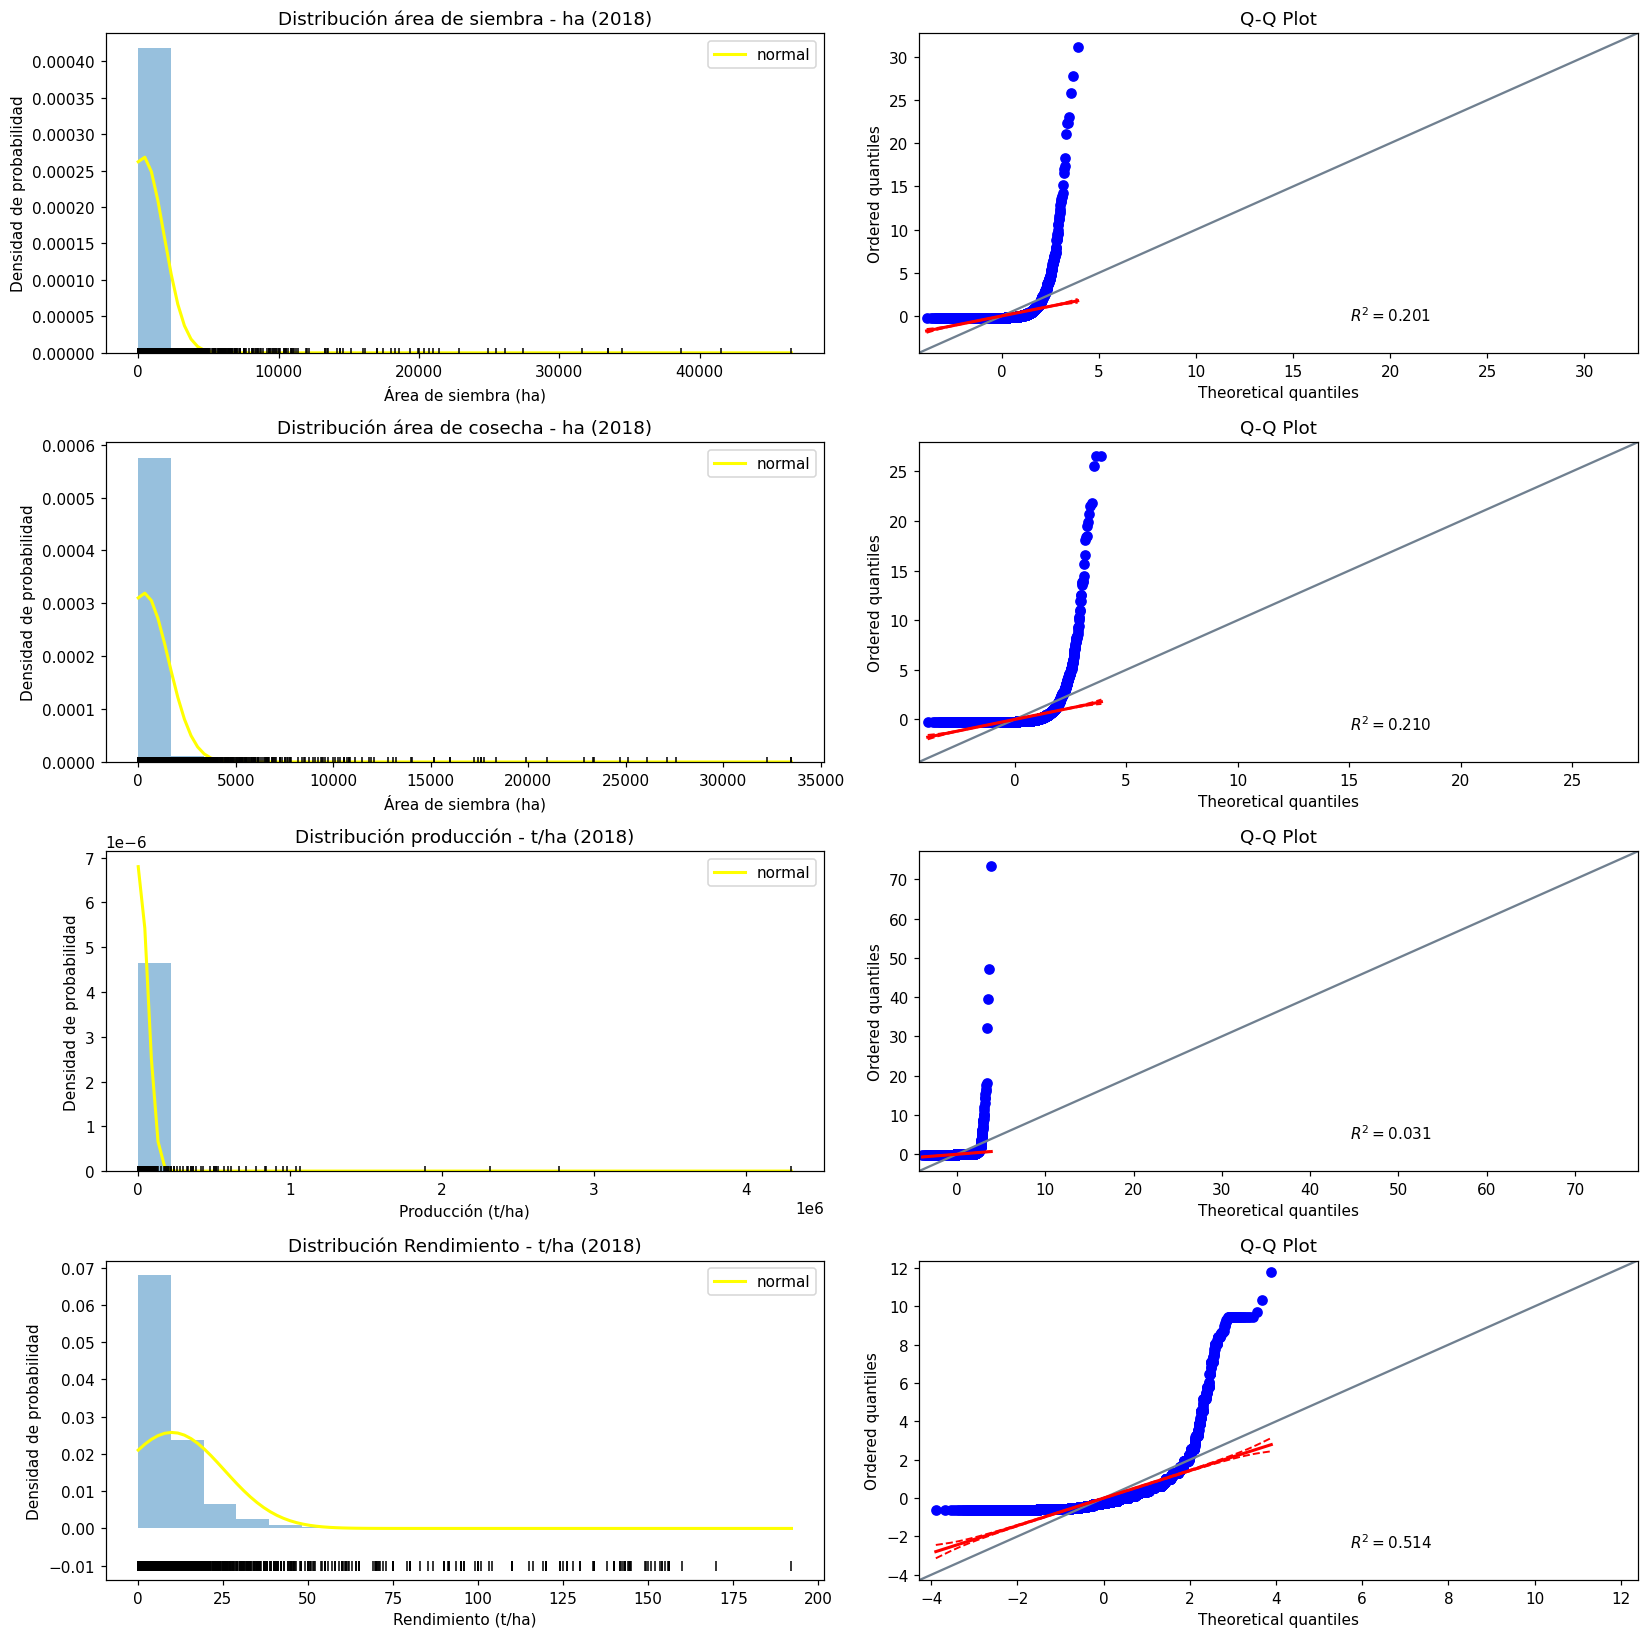

In [ ]:
fig4, axs = plt.subplots(4, 2, figsize=(15, 15))

# Gráfico 1 - cultivos tramsitorios 
mu, sigma = stats.norm.fit(AreaSiembraA2018) #valores de media(mu) y desviación típica (sigma) del grupo

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(AreaSiembraA2018), max(AreaSiembraA2018), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0, 0].plot(x_hat, y_hat, linewidth=2, color="yellow", label='normal') #
axs[0, 0].hist(x=AreaSiembraA2018, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(AreaSiembraA2018, np.full_like(AreaSiembraA2018, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución área de siembra - ha (2018)')
axs[0, 0].set_xlabel('Área de siembra (ha)')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot - transitorios
pg.qqplot(AreaSiembraA2018, dist='norm', ax=axs[0, 1])

# Gráfico 2 - cultivos permanentes
mu, sigma = stats.norm.fit(AreaCosechaA2018)
x_hat = np.linspace(min(AreaCosechaA2018), max(AreaCosechaA2018), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, color="yellow", label='normal')
axs[1, 0].hist(x=AreaCosechaA2018, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(AreaCosechaA2018, np.full_like(AreaCosechaA2018, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución área de cosecha - ha (2018)')
axs[1, 0].set_xlabel('Área de siembra (ha)')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

# Gráfico distribución qq-plot - transitorios
pg.qqplot(AreaCosechaA2018, dist='norm', ax=axs[1, 1])

#Gráfico 3 - cultivos anuales
mu, sigma = stats.norm.fit(ProduccionA2018)
x_hat = np.linspace(min(ProduccionA2018), max(ProduccionA2018), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[2, 0].plot(x_hat, y_hat, linewidth=2, color="yellow", label='normal')
axs[2, 0].hist(x=ProduccionA2018, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[2, 0].plot(ProduccionA2018, np.full_like(ProduccionA2018, -0.01), '|k', markeredgewidth=1)
axs[2, 0].set_title('Distribución producción - t/ha (2018)')
axs[2, 0].set_xlabel('Producción (t/ha)')
axs[2, 0].set_ylabel('Densidad de probabilidad')
axs[2, 0].legend()

pg.qqplot(ProduccionA2018, dist='norm', ax=axs[2, 1])

#Gráfico 4 - cultivos anuales
mu, sigma = stats.norm.fit(RendimientoA2018)
x_hat = np.linspace(min(RendimientoA2018), max(RendimientoA2018), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[3, 0].plot(x_hat, y_hat, linewidth=2, color="yellow", label='normal')
axs[3, 0].hist(x=RendimientoA2018, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[3, 0].plot(RendimientoA2018, np.full_like(RendimientoA2018, -0.01), '|k', markeredgewidth=1)
axs[3, 0].set_title('Distribución Rendimiento - t/ha (2018)')
axs[3, 0].set_xlabel('Rendimiento (t/ha)')
axs[3, 0].set_ylabel('Densidad de probabilidad')
axs[3, 0].legend()

pg.qqplot(RendimientoA2018, dist='norm', ax=axs[3, 1])

plt.tight_layout();

>*   Médidas de forma (Curtosis y Asimetría)



In [ ]:
kurt_AreaSiembra_A2018 = A2018['AreaSiembra(ha)'].kurt()
kurt_AreaCosecha_A2018 = A2018['AreaCosecha(ha)'].kurt()
kurt_Produc_A2018 = A2018['Produc(t/ha)'].kurt()
kurt_Rendimiento_A2018 = A2018['Rendimiento(t/ha)'].kurt()

In [ ]:
skew_AreaSiembra_A2018 = A2018['AreaSiembra(ha)'].skew()
skew_AreaCosecha_A2018 = A2018['AreaCosecha(ha)'].skew()
skew_Produc_A2018 = A2018['Produc(t/ha)'].skew()
skew_Rendimiento_A2018 = A2018['Rendimiento(t/ha)'].skew()

In [ ]:
#Mostrar resultados de curtosis y asimetría en un DF.
Serie_AreaSiembra_A2018 = ['Área de siembra', kurt_AreaSiembra_A2018, skew_AreaSiembra_A2018]
Serie_AreaCosecha_A2018  = ['Área de cosecha', kurt_AreaCosecha_A2018, skew_AreaCosecha_A2018]
Serie_Produc_A2018 = ['Producción', kurt_Produc_A2018, skew_Produc_A2018]
Serie_Rendimiento_A2018 = ['Rendimiento', kurt_Rendimiento_A2018, skew_Rendimiento_A2018]                   
                     
lista1_A2018 = [Serie_AreaSiembra_A2018, Serie_AreaCosecha_A2018, Serie_Produc_A2018, Serie_Rendimiento_A2018]                    
df_kurtSkew_A2018 = pd.DataFrame(lista1_A2018, columns = ['Variable', 'Curtosis', 'Asimetría']) 
print('Valores de curtosis y asimetría (2018)')
df_kurtSkew_A2018

Valores de curtosis y asimetría (2018)


Variable     Curtosis  Asimetría
0  Área de siembra   279.074194  13.887388
1  Área de cosecha   238.566718  13.010980
2       Producción  2732.387495  45.945158
3      Rendimiento    39.966313   5.456807

##3.1. Visualización del comportamiento del sector agrícola en el territorio nacional

In [ ]:
A2018.head()

Depar  Municipio  GpoCultivo SubGpoCultivo Cultivo SistProduc  \
200  ANTIOQUIA  MARINILLA  HORTALIZAS        ACELGA  ACELGA     ACELGA   
201     BOYACA  VIRACACHA  HORTALIZAS        ACELGA  ACELGA     ACELGA   
202     BOYACA   SOGAMOSO  HORTALIZAS        ACELGA  ACELGA     ACELGA   
203    CAQUETA    CURILLO  HORTALIZAS        ACELGA  ACELGA     ACELGA   
204      CAUCA     TIMBIO  HORTALIZAS        ACELGA  ACELGA     ACELGA   

     AreaSiembra(ha)  AreaCosecha(ha)  Produc(t/ha)  Rendimiento(t/ha)  \
200               10               10           277              27.68   
201                2                2             8               4.00   
202                1                1             6               6.00   
203                3                3             9               3.00   
204               10               10            43               4.30   

    CicloCultivo  
200  TRANSITORIO  
201  TRANSITORIO  
202  TRANSITORIO  
203  TRANSITORIO  
204  TRANSITORIO

>*Distribución de los datos según el ciclo productivo de las especies vegetales producidas en el 2018*

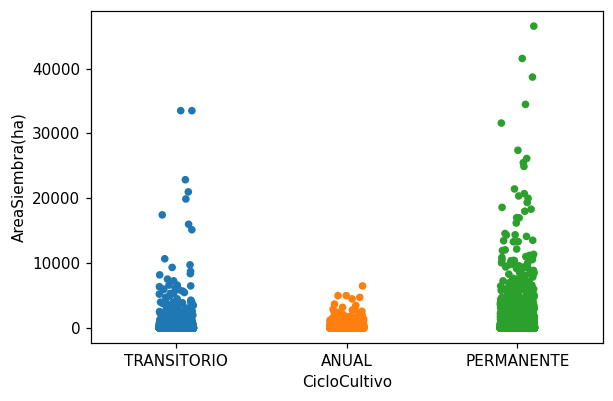

In [ ]:
sns.stripplot(x="CicloCultivo", y="AreaSiembra(ha)", data=A2018);

>*Distribución de los datos por departamento*

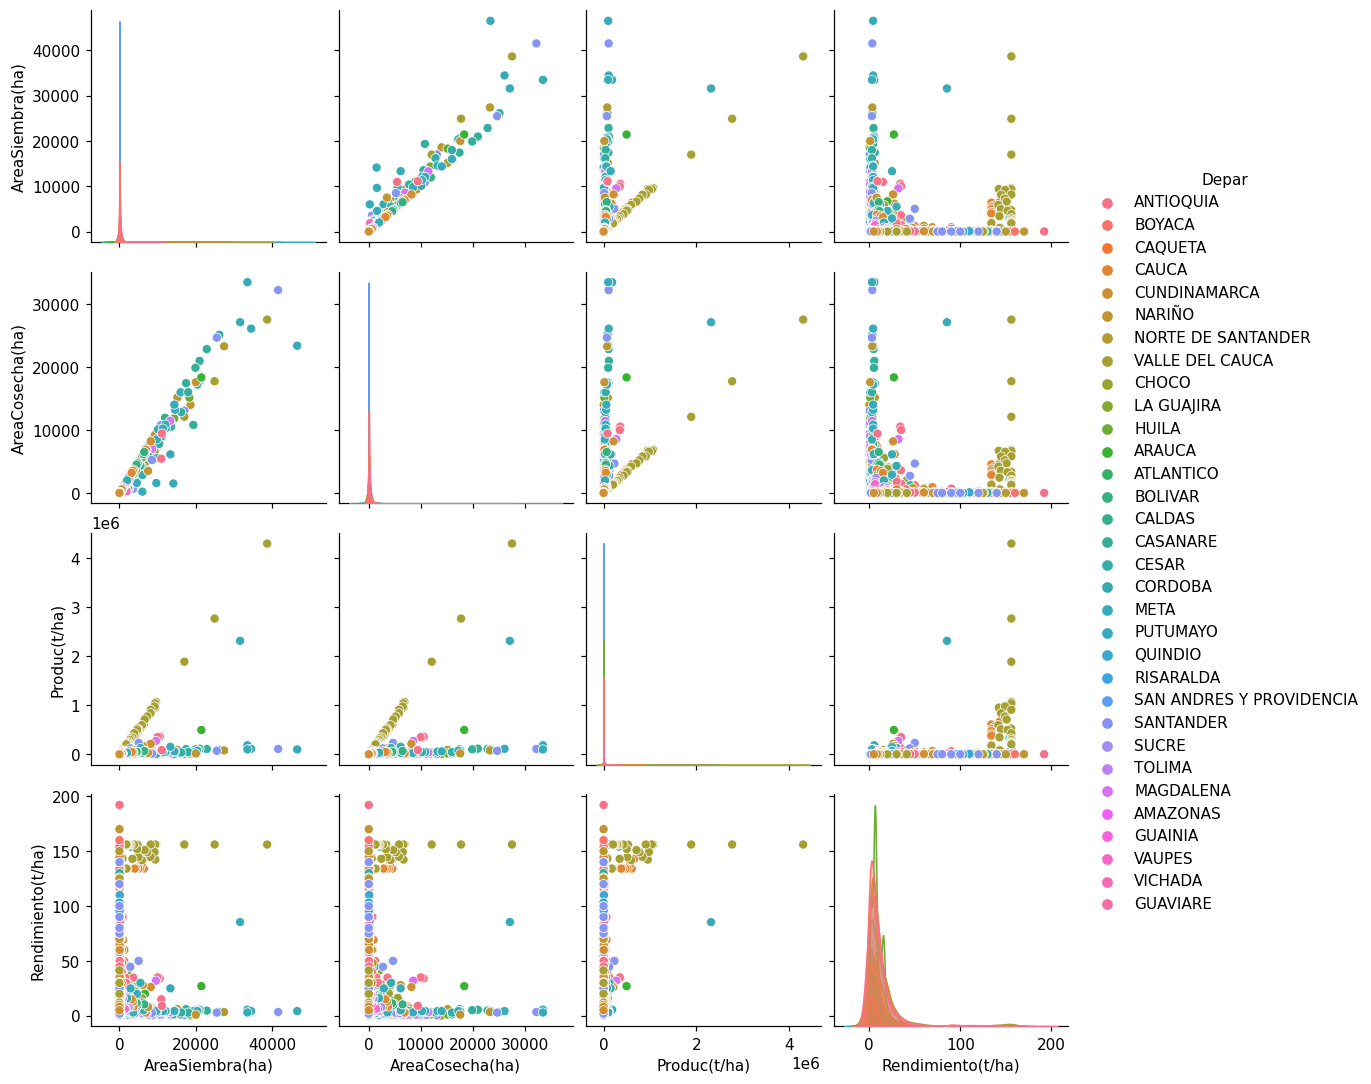

In [ ]:
# Separación de datos por la clase 'Depar' (departamento)
sns.pairplot(A2018, hue = 'Depar', dropna=True);

>*Distribución de los datos por grupo de ciclo de cultivo*

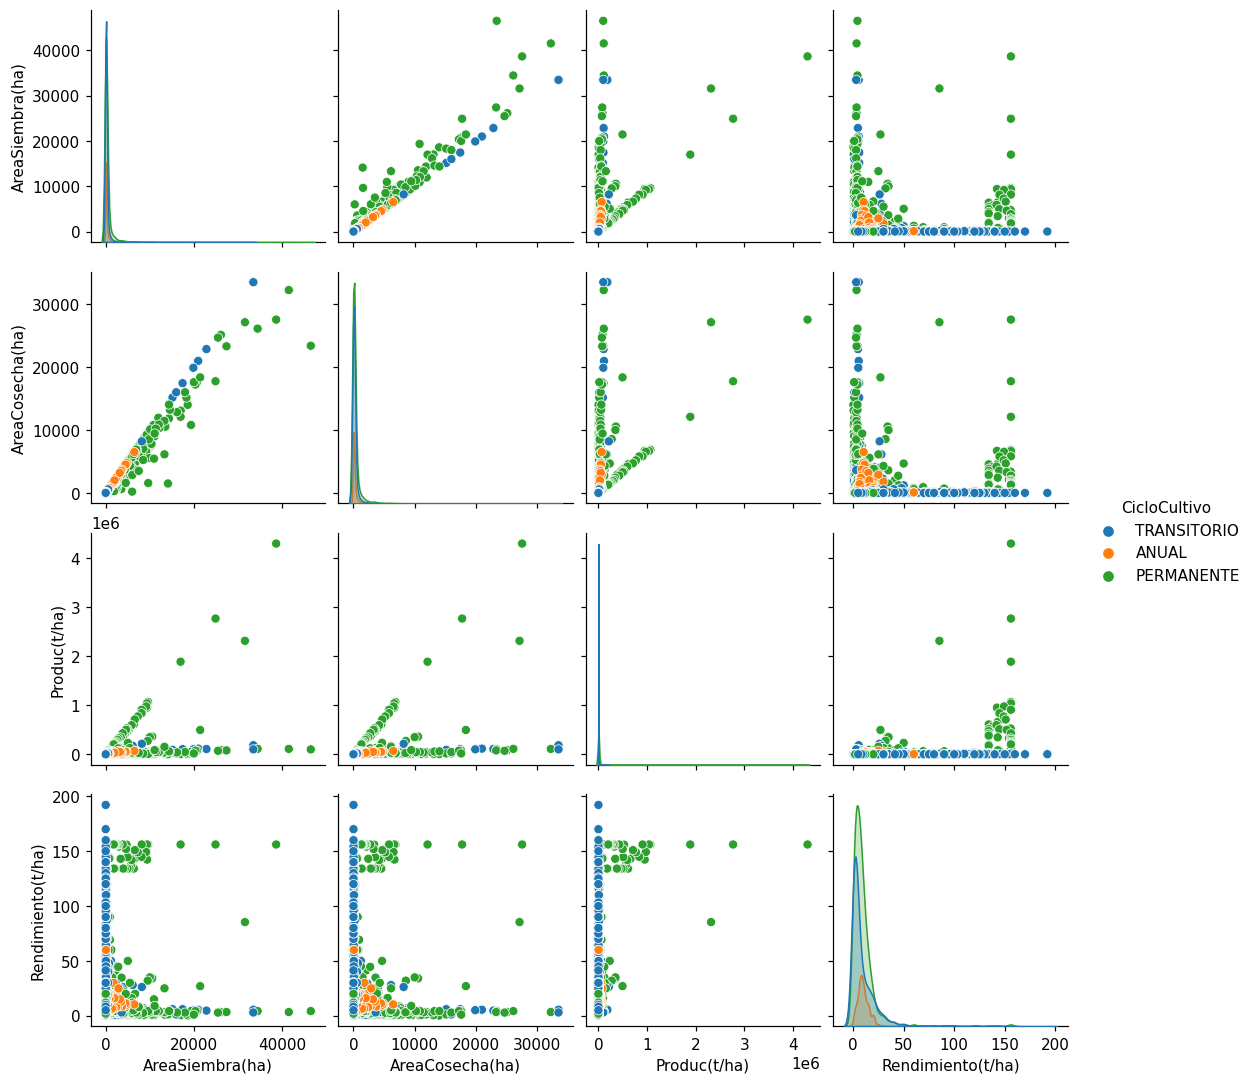

In [ ]:
# Separación de datos por la clase 'CicloCultivo'
sns.pairplot(A2018, hue = 'CicloCultivo', dropna=True);

>Análisis de correlación múltiple entre las variables cuantitativas

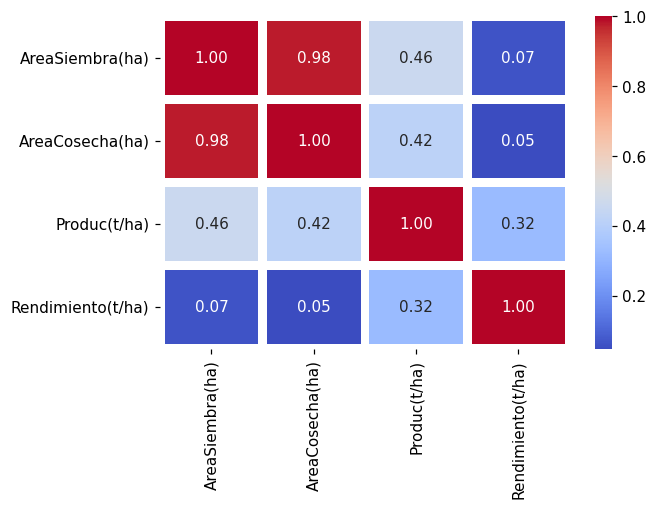

In [ ]:
# Matriz de calor para evaluar la correlación entre las variables del DF 2018
sns.heatmap(A2018.corr(), 
            annot=True,                       # Se muestran los textos correspondientes.
            linewidths=5, linecolor='white',  # Grosor y color de la separación.
            fmt=r'.2f',                       # Formato de la cadena de texto asociada. (2 dígitos decimales)
            cmap='coolwarm');                 # Colormap usado en la visualización.

##**3.2. Distribución de la tierra, producción y rendimiento de la agricultura en el año 2018 (visualización de mapas coropléticos)**

En esta sección se encuentran 4 mapas de Colombia en los cuales fueron plasmados el área de siembra, área de cosecha, productividad y rendimiento para cada uno de los departamentos que conforman al territorio colombiano.

In [ ]:
!pip install -U geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importamos las librerias que seran usadas en esta sección.
import geopandas as gpd # Librería de datos geoespaciales GeoPandas.

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
import json

import shapely                  # Librería de manipulación de objetos geométricos.
from shapely.geometry import *  # Herramientas para manipulación geométrica.

plt.rcParams['figure.dpi'] = 110    

In [ ]:
# Mapa de Colombia
!pip install gdown
!gdown https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir
To: /content/colombia.zip
100% 50.2M/50.2M [00:00<00:00, 164MB/s]


In [ ]:
!unzip colombia.zip

Archive:  colombia.zip
replace divipola_dpto_index.hdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Reducimos el tamaño de las figuras geométricas que conforman cada departamento (polígonos y multipolígonos).
mapDepar = gpd.read_file(r"shapes/Limite Departamental.shp")

In [ ]:
# Reducimos el tamaño de las figuras geométricas que conforman cada departamento (polígonos y multipolígonos).
mapDepar['geometry'] = mapDepar['geometry'].simplify(1e-2)
mapDepar.head()

COD_DEPART  COUNT        Nombre  \
0         05    125     ANTIOQUIA   
1         08     23     ATLANTICO   
2         11      1  BOGOTA, D.C.   
3         13     46       BOLIVAR   
4         15    123        BOYACA   

                                            geometry  
0  POLYGON ((-74.88001 5.74658, -74.99279 5.71491...  
1  POLYGON ((-74.72511 10.77173, -74.72330 10.668...  
2  POLYGON ((-74.00669 4.82357, -73.99905 4.80378...  
3  POLYGON ((-73.81547 7.69167, -73.79711 7.65132...  
4  POLYGON ((-72.74243 6.56634, -72.70467 6.54096...

> Crear un nuevo DF que contenga los valores geométricos de los límites de cada departamento, junto a las variables de producción y rendimiento agrícola de la BD objeto de estudio (EVA).

In [ ]:
#Eliminar el índice 2, el cual pertenece a la ciudad de Bogotá. 
#Esta región del país se elimina debido a que no contamos con datos de área y producción agrícola.
mapDepar = mapDepar.drop([2], axis = 0)
mapDepar.head()

COD_DEPART  COUNT     Nombre  \
0         05    125  ANTIOQUIA   
1         08     23  ATLANTICO   
3         13     46    BOLIVAR   
4         15    123     BOYACA   
5         17     27     CALDAS   

                                            geometry  
0  POLYGON ((-74.88001 5.74658, -74.99279 5.71491...  
1  POLYGON ((-74.72511 10.77173, -74.72330 10.668...  
3  POLYGON ((-73.81547 7.69167, -73.79711 7.65132...  
4  POLYGON ((-72.74243 6.56634, -72.70467 6.54096...  
5  POLYGON ((-75.71407 5.54761, -75.68591 5.52505...

In [ ]:
#Entre los nombres de los departamentos se observa que el departamento de la Guainía tenemos un error en el nombre. 

mapDepar = mapDepar.replace({'GUANIA':'GUAINIA'})

In [ ]:
#Cambiar el nombre de la columna en la cual se encuentran los nombres de los departamentos para poder unir dos DF's
mapDepar.columns = ['COD_DEPART', 'Couns',	'Depar', 'geometry']

In [ ]:
#Crear un nuevo DF con los valores productivos por departamento obtenidos para el año 2018
Var_cuanti_Depr_2018 = A2018.groupby('Depar').agg({'AreaSiembra(ha)':sum, 'AreaCosecha(ha)':sum,'Produc(t/ha)':np.mean,'Rendimiento(t/ha)':np.mean})
Var_cuanti_Depr_2018.head()

AreaSiembra(ha)  AreaCosecha(ha)  Produc(t/ha)  Rendimiento(t/ha)
Depar                                                                       
AMAZONAS              3999             3611    923.478261           3.883478
ANTIOQUIA           403626           343452   2397.129438          11.841405
ARAUCA               77080            67985  14771.515625          12.738750
ATLANTICO            27071            25341    905.433594          11.044648
BOLIVAR             210214           200675   3267.713018           6.821657

In [ ]:
#Unir DF's ('mapDepar' y 'Var_cuanti_Depr_2018') para poder representar los valores en un mapa coroplético.
inner_join_mapDepar_2018 = pd.merge(mapDepar, Var_cuanti_Depr_2018, on = 'Depar', how = 'inner')
inner_join_mapDepar_2018.head()

COD_DEPART  Couns      Depar  \
0         05    125  ANTIOQUIA   
1         08     23  ATLANTICO   
2         13     46    BOLIVAR   
3         15    123     BOYACA   
4         17     27     CALDAS   

                                            geometry  AreaSiembra(ha)  \
0  POLYGON ((-74.88001 5.74658, -74.99279 5.71491...           403626   
1  POLYGON ((-74.72511 10.77173, -74.72330 10.668...            27071   
2  POLYGON ((-73.81547 7.69167, -73.79711 7.65132...           210214   
3  POLYGON ((-72.74243 6.56634, -72.70467 6.54096...           126331   
4  POLYGON ((-75.71407 5.54761, -75.68591 5.52505...           140828   

   AreaCosecha(ha)  Produc(t/ha)  Rendimiento(t/ha)  
0           343452   2397.129438          11.841405  
1            25341    905.433594          11.044648  
2           200675   3267.713018           6.821657  
3           116439    965.920413           9.262314  
4           115015   3047.726496          13.046923

In [ ]:
inner_join_mapDepar_2018.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COD_DEPART         32 non-null     object  
 1   Couns              32 non-null     int64   
 2   Depar              32 non-null     object  
 3   geometry           32 non-null     geometry
 4   AreaSiembra(ha)    32 non-null     int64   
 5   AreaCosecha(ha)    32 non-null     int64   
 6   Produc(t/ha)       32 non-null     float64 
 7   Rendimiento(t/ha)  32 non-null     float64 
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 2.2+ KB


In [ ]:
col_json = json.loads(inner_join_mapDepar_2018.to_json())
print(col_json['features'][0])

{'id': '0', 'type': 'Feature', 'properties': {'AreaCosecha(ha)': 343452, 'AreaSiembra(ha)': 403626, 'COD_DEPART': '05', 'Couns': 125, 'Depar': 'ANTIOQUIA', 'Produc(t/ha)': 2397.1294378698226, 'Rendimiento(t/ha)': 11.841405325443787}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-74.8800113808204, 5.746575611275603], [-74.99279268223637, 5.714906566385082], [-75.0089231086144, 5.681758741073224], [-75.093648226884, 5.655588804080198], [-75.09210778714453, 5.584338173168305], [-75.1283886930836, 5.5550472379398474], [-75.13722196192384, 5.527359633840208], [-75.21976911465276, 5.50349470241872], [-75.27529891361382, 5.4188531644421705], [-75.28147486207507, 5.47649960057629], [-75.31610946727795, 5.462208122307175], [-75.31025299128237, 5.507539861075887], [-75.3280223502511, 5.525190157000285], [-75.3399279199374, 5.602776660114955], [-75.3673468920453, 5.602759780739463], [-75.38375370436978, 5.622609134903827], [-75.36879875755648, 5.640496748426358], [-75.37631231176363, 5.67470

***Mapa de Colombia y su distribución de la tierra destinada a la agricultura para el año 2018 (Área de siembra en número de hectáreas)***

In [ ]:
mapaColSiembra = px.choropleth(inner_join_mapDepar_2018,# El GeoDataFrame/DataFrame donde están los datos
                    geojson = col_json,                 # GeoJSON obtenido a partir de la geometría del GeoDataFrame.
                    color="AreaSiembra(ha)",            # Nombre de la columna del dataframe que queremos representar en el mapa coroplético
                    locations="Depar",                  # Nombre de la columna del dataframe que coincide con las localizaciones
                    featureidkey="properties.Depar",    # Llave dentro del GeoJSON usada como referencia.  
                    color_continuous_scale  = "tempo",
                    projection="mercator",
                    labels={'AreaSiembra(ha)':'Área de siembra (ha)'} # Como queremos que aparezca la información
)
mapaColSiembra.update_geos(fitbounds="locations", visible=False) # Para que aparezca centrado donde están los datos (en Colombia)
mapaColSiembra.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
mapaColSiembra.show()

Para el año 2018 el **departamento del Meta es la región del país que presenta la mayor cantidad de hectáreas destinadas a la agricultura** con un total de 545.000 hectáreas. por otro lado, **la región norte y oriental del país presentaron valores similares en el uso de la tierra**. Finalmente, **el sur del país se caracterizó por presentar un menor uso de tierra** destinadas a esta actividad (menos de 25mil hectáreas, exceptuando al departamento del Caquetá).

***Mapa de Colombia y su distribución de tierra destinada a la agricultura para el año 2018 (Área de cosecha en número de hectáreas)***

---

In [ ]:
mapaColCosecha = px.choropleth(inner_join_mapDepar_2018,# El GeoDataFrame/DataFrame donde están los datos
                    geojson = col_json,                 # GeoJSON obtenido a partir de la geometría del GeoDataFrame.
                    color="AreaCosecha(ha)",            # Nombre de la columna del dataframe que queremos representar en el mapa coroplético
                    locations="Depar",                  # Nombre de la columna del dataframe que coincide con las localizaciones
                    featureidkey="properties.Depar",    # Llave dentro del GeoJSON usada como referencia.  
                    color_continuous_scale  = "tempo",
                    projection="mercator",
                    labels={'AreaCosecha(ha)':'Área de cosecha (ha)'} # Como queremos que aparezca la información
)
mapaColCosecha.update_geos(fitbounds="locations", visible=False) # Para que aparezca centrado donde están los datos (en Colombia)
mapaColCosecha.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
mapaColCosecha.show()

Un comportamiento similar al anterior se presentó con la variable área de cosecha. Este mismo comportamiento se debe principalmente a que las variables AreaSiembra(ha) y AreaCosecha(ha) presentan una correlación positiva (cuando aumenta una aumenta la otra también y viceversa).

***Mapa de Colombia y su distribución de productividad agrícola para el año 2018 (Productividad agrícola en toneladas por hectárea)***

---

In [ ]:
mapaColProduc = px.choropleth(inner_join_mapDepar_2018, # El GeoDataFrame/DataFrame donde están los datos
                    geojson = col_json,                 # GeoJSON obtenido a partir de la geometría del GeoDataFrame.
                    color="Produc(t/ha)",               # Nombre de la columna del dataframe que queremos representar en el mapa coroplético
                    locations="Depar",                  # Nombre de la columna del dataframe que coincide con las localizaciones
                    featureidkey="properties.Depar",    # Llave dentro del GeoJSON usada como referencia.  
                    color_continuous_scale  = "RdBu",
                    projection="mercator",
                    labels={'Produc(t/ha)':'Productividad (t/ha)'} # Como queremos que aparezca la información
)
mapaColProduc.update_geos(fitbounds="locations", visible=False) # Para que aparezca centrado donde están los datos (en Colombia)
mapaColProduc.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
mapaColProduc.show()

Cuando hacemos una división en escala de colores para la variable productividad en t/ha, observamos que el departamento del Valle del Cauca es el más productivo, seguido de los departamentos de Meta y Arauca. Por otro lado, la gran mayoría de departamentos del país presentaron para el 2018 una productividad vegetal por debajo del 5mil t/ha.

***Mapa de Colombia y su distribución de rendimiento agrícola para el año 2018 (Rendimiento agrícola en toneladas por hectárea)***

---

In [ ]:
mapaColRendi= px.choropleth(inner_join_mapDepar_2018,   # El GeoDataFrame/DataFrame donde están los datos
                    geojson = col_json,                 # GeoJSON obtenido a partir de la geometría del GeoDataFrame.
                    color="Rendimiento(t/ha)",          # Nombre de la columna del dataframe que queremos representar en el mapa coroplético
                    locations="Depar",                  # Nombre de la columna del dataframe que coincide con las localizaciones
                    featureidkey="properties.Depar",    # Llave dentro del GeoJSON usada como referencia.  
                    color_continuous_scale  = "RdBu",
                    projection="mercator",
                    labels={'Rendimiento(t/ha)':'Rendimiento (t/ha)'} # Como queremos que aparezca la información
)
mapaColRendi.update_geos(fitbounds="locations", visible=False) # Para que aparezca centrado donde están los datos (en Colombia)
mapaColRendi.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
mapaColRendi.show()

Cuando analizamos el rendimiento productivo (Rendimiento(t/ha)) se observa que la distribución de los departamentos en base a esta variable cambia totalmente. El Valle del Cauca presento el mejor desempeño, seguido de los departamentos de Caldas, Arauca, Meta y Antioquia. Por otro lado, la zona sur y la región caribe del país fueron los departamentos que presentaron el menor desempeño junto al Choco, Tolima, Huila y Boyacá.

Para calcular el Rendimiento (t/ha) se utilizó la siguiente ecuación: 

$$R = \frac{P}{AC}$$

En donde:
R = rendimiento (t/ha),

P = producto (t/ha), y 

AC = área de cosecha (ha).


#**4. Análisis estadístico del departamento de Valle del Cauca (2018)**

El Valle del Cauca fue seleccionado como el departamento que presento la mejor distribución de datos para el año 2018.

In [ ]:
#Crear DF con los datos recolectados en 2018 para el departamento del Valle del Cauca
valle2018 = (A2018.groupby('Depar').get_group('VALLE DEL CAUCA'))
valle2018

Depar   Municipio  GpoCultivo SubGpoCultivo    Cultivo  \
213     VALLE DEL CAUCA        CALI  HORTALIZAS        ACELGA     ACELGA   
214     VALLE DEL CAUCA      YOTOCO  HORTALIZAS        ACELGA     ACELGA   
5207    VALLE DEL CAUCA     SEVILLA    FRUTALES      AGUACATE   AGUACATE   
5208    VALLE DEL CAUCA  CAICEDONIA    FRUTALES      AGUACATE   AGUACATE   
5209    VALLE DEL CAUCA     ARGELIA    FRUTALES      AGUACATE   AGUACATE   
...                 ...         ...         ...           ...        ...   
205791  VALLE DEL CAUCA       YUMBO  HORTALIZAS     ZANAHORIA  ZANAHORIA   
206054  VALLE DEL CAUCA     JAMUNDI    FRUTALES        ZAPOTE     ZAPOTE   
206055  VALLE DEL CAUCA   ANDALUCIA    FRUTALES        ZAPOTE     ZAPOTE   
206056  VALLE DEL CAUCA     PALMIRA    FRUTALES        ZAPOTE     ZAPOTE   
206057  VALLE DEL CAUCA       YUMBO    FRUTALES        ZAPOTE     ZAPOTE   

       SistProduc  AreaSiembra(ha)  AreaCosecha(ha)  Produc(t/ha)  \
213        ACELGA                5                5            20   
214        ACELGA                1                1             1   
5207     AGUACATE              594              384          8448   
5208     AGUACATE              336              311          4340   
5209     AGUACATE              303              263          2630   
...           ...              ...              ...           ...   
205791  ZANAHORIA                2                2            86   
206054     ZAPOTE               13               13            75   
206055     ZAPOTE               10               10           120   
206056     ZAPOTE                3                2            40   
206057     ZAPOTE                2                2            24   

        Rendimiento(t/ha) CicloCultivo  
213                  4.00  TRANSITORIO  
214                  0.50  TRANSITORIO  
5207                22.00   PERMANENTE  
5208                13.95   PERMANENTE  
5209                10.00   PERMANENTE  
...                   ...          ...  
205791              41.33  TRANSITORIO  
206054               6.00   PERMANENTE  
206055              12.00   PERMANENTE  
206056              20.00   PERMANENTE  
206057              12.00   PERMANENTE  

[1005 rows x 11 columns]

*Distribución de datos por ciclo de cultivo según el área de siembra*

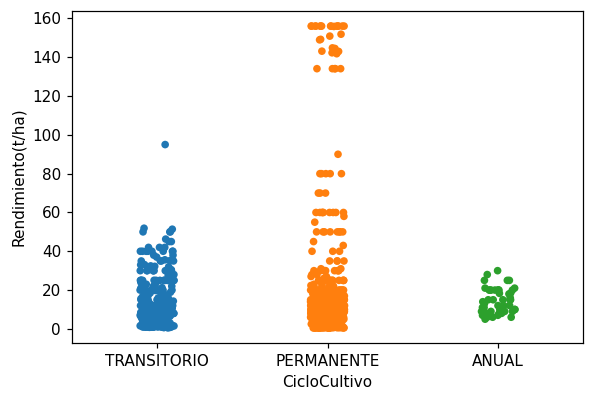

In [ ]:
sns.stripplot(x = "CicloCultivo", y = "Rendimiento(t/ha)", data=valle2018);

*Principales cultivos permanentes en el departamento del Valle del Cauca*

In [ ]:
productoCutivado = valle2018.groupby('CicloCultivo').get_group('PERMANENTE')
productoCutivado.loc[:,'Cultivo'].value_counts().head(10)

PLATANO           40
CAFE              39
AGUACATE          37
BANANO            37
CITRICOS          37
CAÑA PANELERA     35
MARACUYA          31
CACAO             30
CAÑA AZUCARERA    30
LULO              25
Name: Cultivo, dtype: int64

##**4.1. Estadística descriptiva**

In [ ]:
##Valores descriptivos --> variables cuantitativas X tipo de cultivo.
descrip_valle2018 = valle2018.groupby('GpoCultivo').agg([np.sum, min, max, np.mean, np.median, mode, np.std])
descrip_valle2018

AreaSiembra(ha)             \
                                                             sum min    max   
GpoCultivo                                                                    
CEREALES                                                   12215   2   1647   
FIBRAS                                                       135   1    104   
FLORES Y FOLLAJES                                             90   1     51   
FRUTALES                                                   31212   1   2388   
HORTALIZAS                                                  2912   1    490   
LEGUMINOSAS                                                 1975   1    183   
OLEAGINOSAS                                                  213   3     90   
OTROS PERMANENTES                                         260480   3  38678   
PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES             401   1    154   
TUBERCULOS Y PLATANOS                                      31627   1   4298   

                                                                      \
                                                         mean median   
GpoCultivo                                                             
CEREALES                                           156.602564   40.0   
FIBRAS                                              33.750000   15.0   
FLORES Y FOLLAJES                                    9.000000    4.5   
FRUTALES                                            79.419847   20.0   
HORTALIZAS                                          16.640000    6.0   
LEGUMINOSAS                                         23.511905   12.0   
OLEAGINOSAS                                         21.300000   12.0   
OTROS PERMANENTES                                 1943.880597  357.5   
PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES    16.708333    6.0   
TUBERCULOS Y PLATANOS                              340.075269   30.0   

                                                                   \
                                                             mode   
GpoCultivo                                                          
CEREALES                                                       10   
FIBRAS                                            [1, 2, 28, 104]   
FLORES Y FOLLAJES                                          [2, 6]   
FRUTALES                                                        5   
HORTALIZAS                                                      5   
LEGUMINOSAS                                               [3, 20]   
OLEAGINOSAS                                               [3, 12]   
OTROS PERMANENTES                                              11   
PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES          [2, 10]   
TUBERCULOS Y PLATANOS                                          10   

                                                              AreaCosecha(ha)  \
                                                          std             sum   
GpoCultivo                                                                      
CEREALES                                           331.811766           12215   
FIBRAS                                              48.472501             135   
FLORES Y FOLLAJES                                   14.988885              85   
FRUTALES                                           211.901099           25110   
HORTALIZAS                                          41.684524            2912   
LEGUMINOSAS                                         30.290757            1975   
OLEAGINOSAS                                         26.595948             171   
OTROS PERMANENTES                                 4604.878102          194795   
PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES    33.047369             382   
TUBERCULOS Y PLATANOS                              846.451766           29372   

                                                                          \
                                                 min    

*Distribución de datos por grupo de cultivo en el Valle del Cauca*

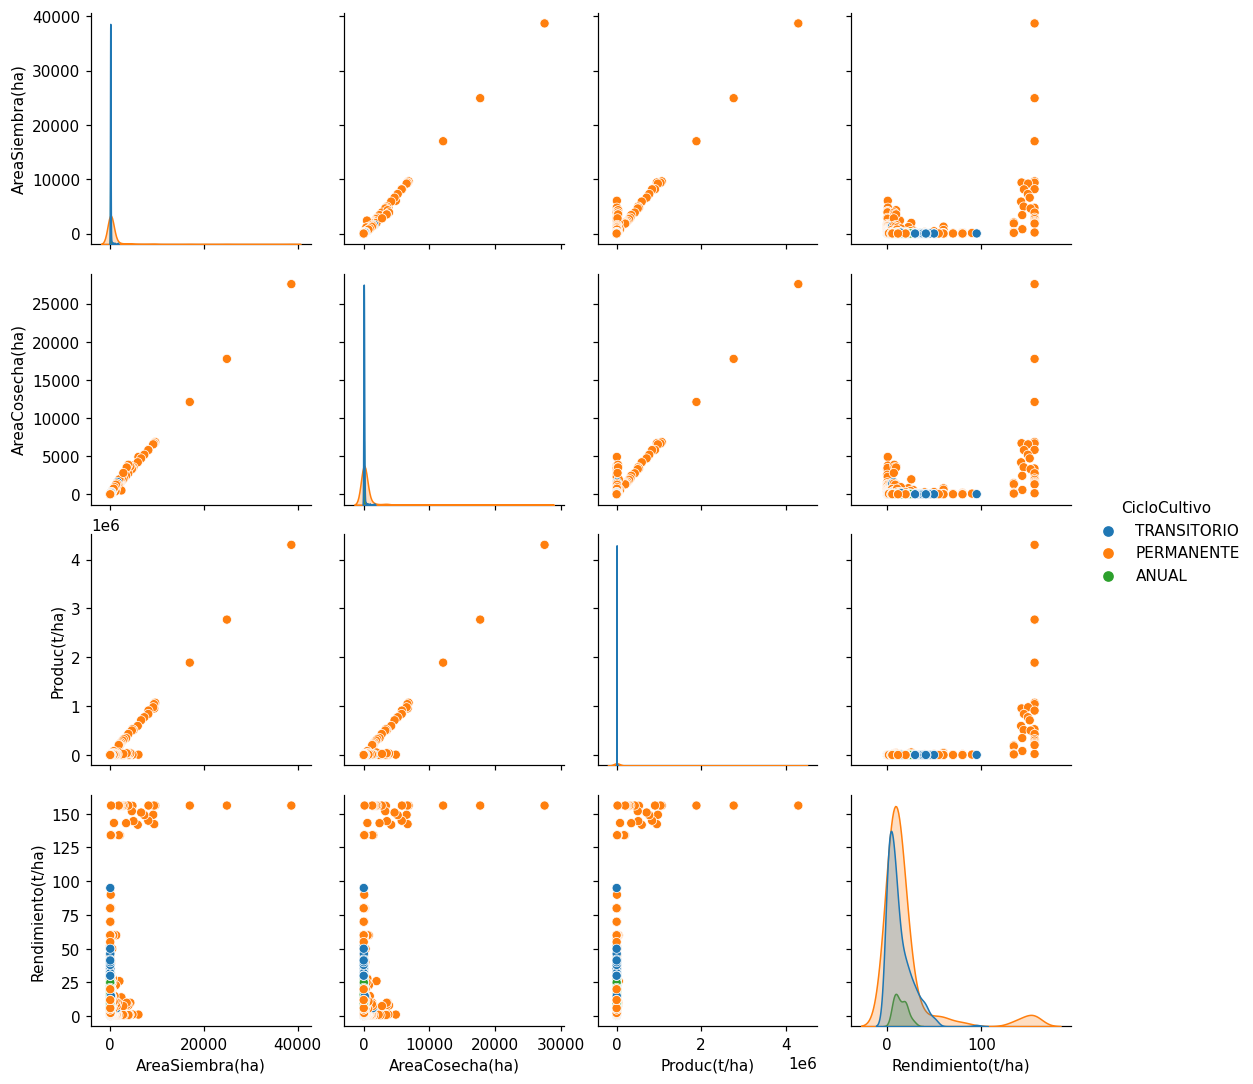

In [ ]:
# Separación de datos por la clase 'Depar' (departamento)
sns.pairplot(valle2018, hue = 'CicloCultivo', dropna=True);

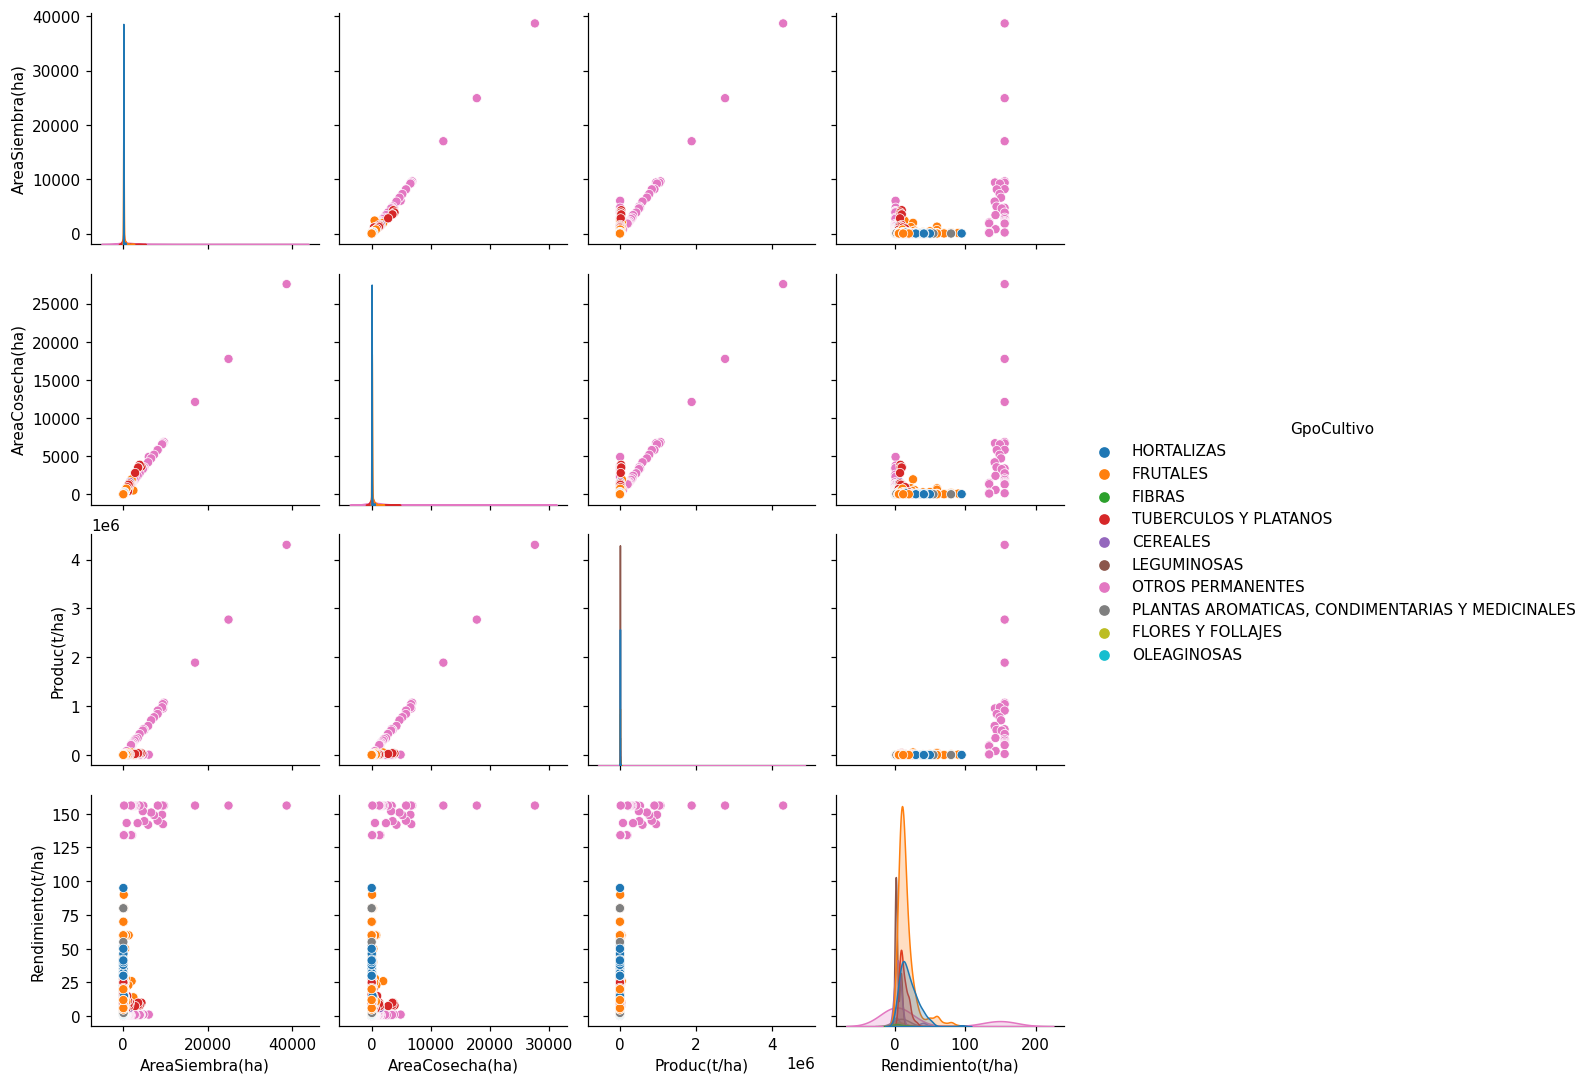

In [ ]:
# Separación de datos por la clase 'Depar' (departamento)
sns.pairplot(valle2018, hue = 'GpoCultivo', dropna=True);

>*Creación de conjunto de datos por rendimiento (t/ha) y tipo de ciclo productivo*

In [ ]:
#Datos de rendimiento (t/ha) para el grupo de ciclo anual
valle2018_ciclo_anual = valle2018.loc[valle2018.CicloCultivo == 'ANUAL', 'Rendimiento(t/ha)']
valle2018_ciclo_anual.head()

13748    11.0
13749    15.0
13750    13.0
13751    20.0
13752    11.0
Name: Rendimiento(t/ha), dtype: float64

In [ ]:
#Datos de rendimiento (t/ha) para el grupo de ciclo permanente
valle2018_ciclo_permanente = (valle2018.groupby('CicloCultivo').get_group('PERMANENTE'))
valle2018_ciclo_permanente = valle2018_ciclo_permanente['Rendimiento(t/ha)']
valle2018_ciclo_permanente.head()

5207    22.00
5208    13.95
5209    10.00
5210     6.00
5211     8.00
Name: Rendimiento(t/ha), dtype: float64

In [ ]:
#Datos de rendimiento (t/ha) para el grupo de ciclo transitorio
valle2018_ciclo_transitorio = (valle2018.groupby('CicloCultivo').get_group('TRANSITORIO'))
valle2018_ciclo_transitorio = valle2018_ciclo_transitorio['Rendimiento(t/ha)']
valle2018_ciclo_transitorio.head()

213      4.00
214      0.50
8047    13.00
8048    25.00
8049    30.52
Name: Rendimiento(t/ha), dtype: float64

>*Visualización de la distribución*

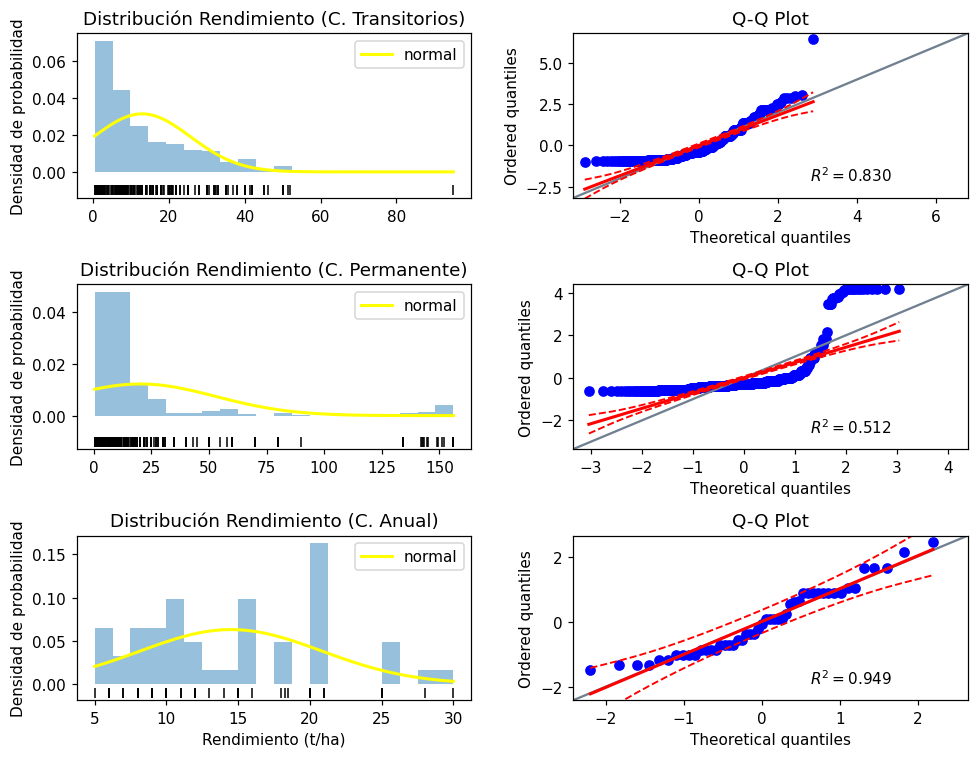

In [ ]:
fig5, axs = plt.subplots(3, 2, figsize=(9, 7))

Rendimiento_Trans = valle2018_ciclo_transitorio #agrupamos los valores por Transitorio y rendimiento
mu, sigma = stats.norm.fit(Rendimiento_Trans) #valores de media(mu) y desviación típica (sigma) del grupo

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Rendimiento_Trans), max(Rendimiento_Trans), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)


# Gráfico 1 - cultivos tramsitorios 
axs[0, 0].plot(x_hat, y_hat, linewidth=2, color = 'yellow', label='normal')
axs[0, 0].hist(x=Rendimiento_Trans, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(Rendimiento_Trans, np.full_like(Rendimiento_Trans, -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución Rendimiento (C. Transitorios)')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot - transitorios
pg.qqplot(Rendimiento_Trans, dist='norm', ax=axs[0, 1])

# Gráfico 2 - cultivos permanentes
Rendimiento_Perma = valle2018_ciclo_permanente
mu, sigma = stats.norm.fit(Rendimiento_Perma)
x_hat = np.linspace(min(Rendimiento_Perma), max(Rendimiento_Perma), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, color = 'yellow', label='normal')
axs[1, 0].hist(x=Rendimiento_Perma, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(Rendimiento_Perma, np.full_like(Rendimiento_Perma, -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución Rendimiento (C. Permanente)')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

# Gráfico distribución qq-plot - transitorios
pg.qqplot(Rendimiento_Perma, dist='norm', ax=axs[1, 1])

#Gráfico 3 - cultivos anuales
Rendimiento_Anual = valle2018_ciclo_anual
mu, sigma = stats.norm.fit(Rendimiento_Anual)
x_hat = np.linspace(min(Rendimiento_Anual), max(Rendimiento_Anual), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[2, 0].plot(x_hat, y_hat, linewidth=2, color = 'yellow', label='normal')
axs[2, 0].hist(x=Rendimiento_Anual, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[2, 0].plot(Rendimiento_Anual, np.full_like(Rendimiento_Anual, -0.01), '|k', markeredgewidth=1)
axs[2, 0].set_title('Distribución Rendimiento (C. Anual)')
axs[2, 0].set_xlabel('Rendimiento (t/ha)')
axs[2, 0].set_ylabel('Densidad de probabilidad')
axs[2, 0].legend()

# Gráfico distribución qq-plot - anuales
pg.qqplot(Rendimiento_Anual, dist='norm', ax=axs[2, 1])

plt.tight_layout();

Los anteriores histogramas nos permiten comprender la forma de la distribución de cada conjunto de variables. Es así, que en los histogramas obtenidos podemos concluir en primera instancia que de los 3 tipos de ciclos de cultivo analizados **los conjuntos de datos de ciclo transitorio y anual presentan un sesgado positivo** ya que la mayoría de datos se posicional a lado del eje Y. En relación a los datos de **ciclo anual presentan aparentemente una distribución casi normal**, pues, se observa un sesgo simétrico y con forma de campana.

Por otro lado, en los **gráficos q-q plot** se observa que *los puntos azules se alejan de la línea roja, la cual indica la existencia de desviación de la normalidad* en el grupo de datos. Se puede observar que este comportamiento *es mayor para los cultivos transitorios y perenes*, pero, en el caso de los *cultivos anuales es posible que exista una distribución normal*. Sin embargo, **para tener más seguridad, debemos realizar un test de normalidad.**


##*4.2. Cálculo de la Curtosis y Asimetría*

In [ ]:
#Calcular medianas de cada ciclo
media_valle2018_ciclo_transitorio  = valle2018_ciclo_transitorio.mean()
media_valle2018_ciclo_permanente = valle2018_ciclo_permanente.mean()

media_valle2018_ciclo_anual = valle2018_ciclo_anual.mean()


In [ ]:
#Calcular el valor de curtosis de cada ciclo
kurt_valle2018_ciclo_transitorio  = valle2018_ciclo_transitorio.kurt()
kurt_valle2018_ciclo_permanente = valle2018_ciclo_permanente.kurt()
kurt_valle2018_ciclo_anual = valle2018_ciclo_anual.kurt()

In [ ]:
#Calcular el valor de la asímetria de cada ciclo
skew_valle2018_ciclo_transitorio  = valle2018_ciclo_transitorio.skew()
skew_valle2018_ciclo_permanente = valle2018_ciclo_permanente.skew()
skew_valle2018_ciclo_anual = valle2018_ciclo_anual.skew()

In [ ]:
#Crear una serie con los resultados de las medias, curtosis y asimetría para cada tipo de ciclo productivo
Serie_Transitoria_valle2018  = ['Transitorio', media_valle2018_ciclo_transitorio, kurt_valle2018_ciclo_transitorio, skew_valle2018_ciclo_transitorio]
Serie_Permanente_valle2018 = ['Permanente', media_valle2018_ciclo_permanente, kurt_valle2018_ciclo_permanente, skew_valle2018_ciclo_permanente]
Serie_Anual_valle2018 = ['Anual', media_valle2018_ciclo_anual, kurt_valle2018_ciclo_anual, skew_valle2018_ciclo_anual]

In [ ]:
#Crear un DF con las series mencionadas anteriormente y mostrar dicho DF con los valores.
listaSeries_valle2018 = [Serie_Transitoria_valle2018,Serie_Permanente_valle2018, Serie_Anual_valle2018]                    
kurtSkew_valle2018 = pd.DataFrame(listaSeries_valle2018, columns = ['Variable', 'Media', 'Curtosis','Asimetría']) 
print('Valores de medias, curtosis y asimetría para las cada ciclo productivo en Valle del Cauca (2018)')
kurtSkew_valle2018

Valores de medias, curtosis y asimetría para las cada ciclo productivo en Valle del Cauca (2018)


Variable      Media  Curtosis  Asimetría
0  Transitorio  13.009423  4.701595   1.705712
1   Permanente  20.243851  9.824115   3.221555
2        Anual  14.506327 -0.629399   0.486844

*  *Explicación de los resultados:* 

En los valores de curtosis se observa que el conjunto de datos de **ciclo anual** presentaron un valor negativo **menor a 3 (-0.6)**, por consiguiente se puede afirmar que existe **baja concentración de datos entorno a su media (platicúrtica)**. Por otro lado, el conjunto de datos perteneciente a los **ciclos de cultivo permanente y transitorio** presentan valores **mayores a 3 (9.8 y 4.7, respectivamente)**; con esto se puede afirmar que existe gran **concentración de datos entorno a sus respectivas medias (distribución leptocúrtica)**. Cabe resaltar que la distribución de los datos de *ciclo transitorio están más cercano a representar una distribución normal de que permanente*, ya que su valor es más próximo a 3.

En relación a los **valor de asimetría** observamos que todos los valores son positivos, lo que infiere, que a pensar que las gráficas de distribución pueden presentar una distribución de ***forma asimétricamente positiva o con sesgo positivo a la izquierda***, sus valores tienden a concentrarse más hacia la parte izquierda que en la derecha de la media.


##4.3. Test de normalidad Shapiro-Wilk

In [ ]:
pg.normality(data = valle2018, method = 'shapiro', dv ='Rendimiento(t/ha)', group ='CicloCultivo', alpha = 0.05)

W          pval  normal
TRANSITORIO  0.832019  3.256187e-19   False
PERMANENTE   0.512319  2.237414e-37   False
ANUAL        0.942173  1.798677e-02   False


Este test (Shapiro-Wilk) pone a prueba la hipótesis nula de que los datos presentan distribución normal.

Para este caso fue considero un nivel de significancia del 0.05, lo que equivale a un $\alpha = 0.05$. De este modo, los resultados demostraron un *p-valor < 0.05*, lo que significa que debemos rechazar la hipótesis nula en favor de la hipótesis alternativa, indicando que los datos no distribuyen normalmente.


## 4.4. Intervalos de confianza según sea el ciclo de cultivo

In [ ]:
valle2018.groupby('CicloCultivo').size()

CicloCultivo
ANUAL           49
PERMANENTE     592
TRANSITORIO    364
dtype: int64

Se calculo el valor máximo y mínimo para el rendimiento agrícola en toneladas por hectárea para cada uno de los ciclos de cultivos utilizados en el departamento del Valle del Cauca.



>Intervalo de confianza para el rendimiento (t/ha) para los cultivos de ciclo anual

In [ ]:
#Creal DF con valores de rendimiento (t/ha) para el grupo de Ciclo anual
valle2018_ciclo_anual = (valle2018.groupby('CicloCultivo').get_group('ANUAL')).drop(['Depar','Municipio','GpoCultivo','SubGpoCultivo','Cultivo','SistProduc','AreaSiembra(ha)','AreaCosecha(ha)','Produc(t/ha)','CicloCultivo'], axis = 1)
valle2018_ciclo_anual.head()

Rendimiento(t/ha)
13748               11.0
13749               15.0
13750               13.0
13751               20.0
13752               11.0

In [ ]:
stats.sem(valle2018_ciclo_anual)

array([0.91341061])

In [ ]:
#Calcular intervalo
limite_inferior, limite_superior =sm.stats.DescrStatsW(valle2018_ciclo_anual).tconfint_mean(alpha = 0.05)
intervalo_ciclo_anual = (limite_inferior, limite_superior)
print(intervalo_ciclo_anual)

(array([12.66979142]), array([16.34286164]))


*Interpretación:* en el departamento del Valle del Cauca **los cultivos de ciclo productivo anual** presentan **rendimiento** agrícola en toneladas por hectárea entre **12,67 t/ha** a **16,34 t/ha**. Esto lo podemos afirmar con un **nivel de confianza del 95%**.

>IC para el rendimiento (t/ha) de las plantas de ciclo de cultivo permanente


In [ ]:
#Creal DF con valores de rendimiento (t/ha) para el grupo de Ciclo anual
valle2018_ciclo_permanente = (valle2018.groupby('CicloCultivo').get_group('PERMANENTE'))
valle2018_ciclo_permanente = valle2018_ciclo_permanente['Rendimiento(t/ha)']
valle2018_ciclo_permanente

5207      22.00
5208      13.95
5209      10.00
5210       6.00
5211       8.00
          ...  
194536    12.00
206054     6.00
206055    12.00
206056    20.00
206057    12.00
Name: Rendimiento(t/ha), Length: 592, dtype: float64

In [ ]:
stats.sem(valle2018_ciclo_permanente)

1.3452387231835525

In [ ]:
#Calcular intervalo
limite_inferior, limite_superior =sm.stats.DescrStatsW(valle2018_ciclo_permanente).tconfint_mean(alpha = 0.05)
intervalo_ciclo_permanente = (limite_inferior, limite_superior)
print(intervalo_ciclo_permanente)

(17.601821233983262, 22.885881468719443)


*Interpretación:* en el departamento del Valle del Cauca las **plantas de ciclo productivo permanente** presentan un **rendimiento** agricola de **17,60 t/ha** a **22,88 t/ha**. Esto lo podemos afirmar con un **nivel de confianza del 95%**.

>Intervalo de confianza para el rendimiento (t/ha) para los cultivos de ciclo transitorio


In [ ]:
#Creal DF con valores de rendimiento (t/ha) para el grupo de Ciclo transitorio
valle2018_ciclo_transitorio = (valle2018.groupby('CicloCultivo').get_group('TRANSITORIO'))
valle2018_ciclo_transitorio = valle2018_ciclo_transitorio['Rendimiento(t/ha)']
valle2018_ciclo_transitorio

213        4.00
214        0.50
8047      13.00
8048      25.00
8049      30.52
          ...  
191912    42.00
205788    15.00
205789    30.00
205790    30.00
205791    41.33
Name: Rendimiento(t/ha), Length: 364, dtype: float64

In [ ]:
stats.sem(valle2018_ciclo_transitorio)

0.6675102833262165

In [ ]:
#Calcular intervalo
limite_inferior, limite_superior =sm.stats.DescrStatsW(valle2018_ciclo_transitorio).tconfint_mean(alpha = 0.05)
intervalo_ciclo_transitorio = (limite_inferior, limite_superior)
print(intervalo_ciclo_transitorio)

(11.69675032697048, 14.322095826875671)


*Interpretación:* en el departamento del Valle del Cauca las **plantas de ciclo productivo transitorio** presentan **rendimiento** agrícola de **11,69 t/ha** a **14,32 t/ha**. Esto lo podemos afirmar con un **nivel de confianza del 95%**.

##*4.5. Correlación entre las variables*

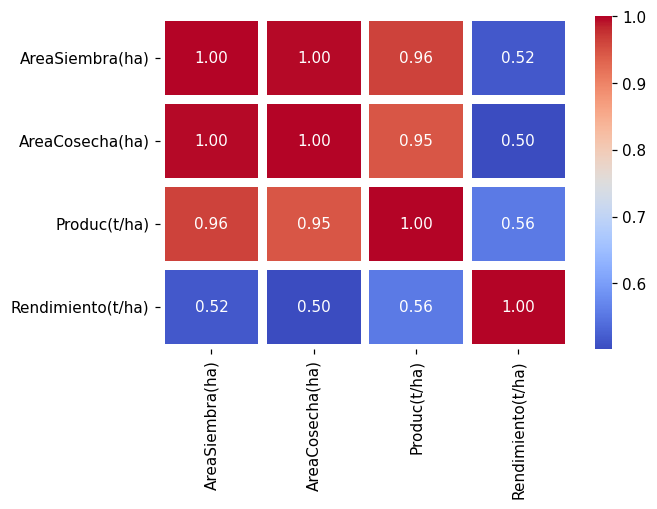

In [ ]:
# Matriz de calor para evaluar la correlación entre las variables del DF valle2018

sns.heatmap(valle2018.corr(), 
            annot=True,                       # Se muestran los textos correspondientes.
            linewidths=5, linecolor='white',  # Grosor y color de la separación.
            fmt=r'.2f',                       # Formato de la cadena de texto asociada. (2 dígitos decimales)
            cmap='coolwarm');                 # Colormap usado en la visualización.

#**Conclusiones**

* La base de datos EVA (Evaluaciones_Agropecuarias_Municipales) puede ser considerada como una BD que puede ofrecer un sin número de informaciones, como se intentó demostrar en este proyecto de análisis.
* Se logro evidenciar una correlación positiva entre el área de siembre y el de cosecha para los tres análisis estadísticos realizados en este proyecto.
* Fue posible calcular un intervalo de confianza por cada tipo de ciclo productivo (transitorio, anual y permanente) para el departamento del Valle del Cauca con un nivel de confianza del 95%.
* El conjunto de datos pertenecientes al Valle del Cauca (2018) fueron los datos que presentaron la mejor distribución, aun así, se concluyó por medio de un test de normalidad que no existe una distribución normal en los datos. 
* Se puede concluir que gran parte la eficiencia productiva alcanzada por el Valle del Cauca es debido a que existe una correlación positiva entre la producción en tonelada por hectárea y las variables de área de siembre y de cosecha. Estos resultados, pueden estar asociados al tipo de ciclo productivo, dado que, en este departamento los cultivos permanentes son más predominantes. 

*Conclusiones de la actividad*
* La limpieza de datos es fundamental para poder obtener información confiable de cualquier base de datos a ser analizada. 
* Se puede concluir que a pesar de la disminución que se presentó en el área de tierra sembrada y cosechada entre el 2016 y 2018 la productividad y el rendimiento aumentaron, esto puede ser producto de una mayor tecnificación en el sector. 
* En relación a la distribución se puede decir que es fundamental realizar una correcta limpieza de datos, y además de esto, una división por grupos para obtener histogramas que representen con más precisión la realidad. Como se observó, en el histograma del ítem 2.2. al plasmar la distribución de todo el conjunto de datos no se obtuvieron resultados satisfactorios, sin embargo, cuando se analizó la distribución por conjunto de datos (año 2018 y el departamento del Valle del Causa) fue posible evidenciaría que la posibilidad de alcanzar una distribución de los datos es más probable.


In [ ]:
#Elegir una columna especifica de una multi-indes
from pandas.io.formats.style_render import MultiIndex
MultiIndex,eva_copy['AreaSiembra(ha)'].kurt()
